In [5037]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import os
from tabulate import tabulate
import seaborn as sns
import scikitplot as skplt
from numpy import percentile
import math
from numpy import arange
import IPython.display as ipd
import matplotlib.lines as mlines

#pandas
from pandas.plotting import parallel_coordinates
import datetime

#sklearn
from sklearn.preprocessing import PowerTransformer, QuantileTransformer
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler, RobustScaler, StandardScaler

from sklearn.decomposition import PCA
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import learning_curve

from sklearn.metrics import accuracy_score, f1_score, classification_report, confusion_matrix
from sklearn.metrics import multilabel_confusion_matrix, roc_curve, auc
from sklearn.metrics import roc_auc_score, precision_score, recall_score, make_scorer
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline

#scikitplot
from scikitplot.metrics import plot_roc
from scikitplot.metrics import plot_precision_recall
from scikitplot.metrics import plot_lift_curve
from scikitplot.metrics import plot_cumulative_gain

#tslearn
from tslearn.metrics import dtw, dtw_path, cdist_dtw, subsequence_cost_matrix

#mlxtend
from mlxtend.plotting import plot_decision_regions

#matplotlib
from matplotlib.ticker import (MultipleLocator, AutoMinorLocator)
from matplotlib import pyplot

#seaborn
import seaborn as sns

#scipy
import scipy.stats as stats
from scipy.stats import shapiro, mannwhitneyu, normaltest, kstest
from scipy.stats import boxcox, yeojohnson
from scipy.spatial.distance import euclidean, cityblock, cosine, minkowski
from scipy.spatial.distance import cdist

#matrixprofile
import matrixprofile
from matrixprofile import *
from matrixprofile.discords import discords

In [5038]:
def plot_time_series_years(column, legend_item, color, together, df, columns, period_type):
    if not together and column != "" and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        ts = df[column]
        plt.plot(ts, color = color)
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = df[columns[0]]  #Studio_Recording
        ts2 = df[columns[1]]  #Live_Recording
        plt.plot(ts1, color = '#ea0064')
        plt.plot(ts2, color = '#b329ff')
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.xticks(list(df.index))
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5039]:
def plot_other_time_series(ts1, ts2, together, columns, period_type):
    
    if not together:
        time_series = [ts1, ts2]
        colors = ['#ea0064', '#b329ff']
        for ts, color, column in zip(time_series, colors, columns):
            fig, ax = plt.subplots(figsize=(8, 5))
            legend_item = column.replace(("_"+period_type+"_freq"), "").replace("_", " ")
            plt.plot(ts.values, color = color)
            plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
            plt.grid()
            plt.legend([legend_item], title="Album type")
            plt.ylabel("count")
            plt.title(column + " TS")
            
            if period_type == 'month':
                ax.xaxis.set_major_locator(MultipleLocator(20))
                ax.xaxis.set_minor_locator(MultipleLocator(10))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            if period_type == 'week':
                ax.xaxis.set_major_locator(MultipleLocator(100))
                ax.xaxis.set_minor_locator(MultipleLocator(50))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
            plt.show()
        
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
        
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
   
        plt.show()

In [5040]:
def plot_other_time_series2(ts, column, ts1, ts2, legend_item, color, together, columns, period_type):
    
    if not ts1 and not ts2 and not together and legend_item != "" and color != "":
        fig, ax = plt.subplots(figsize=(8, 5))
        plt.plot(ts.values, color = color)
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([legend_item], title="Album type")
        plt.ylabel("count")
        plt.title(column + " TS")
    else:
        fig, ax = plt.subplots(figsize=(8, 5))
        ts1 = ts1  #Studio_Recording
        ts2 = ts2  #Live_Recording
        plt.plot(ts1.values, color = '#ea0064')
        plt.plot(ts2.values, color = '#b329ff')
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.grid()
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.ylabel("count")
        plt.title(columns[0] + " - " + columns[1] + " TSs")
    plt.show()

In [5041]:
#Transformations
def offset_translation(ts):
    return ts - ts.mean()

def amplitude_scaling(ts):
    return (ts - ts.mean())/ts.std()

def noise(ts):
    return ((ts - ts.mean())/ts.std()).rolling(window=1).mean()

def trend_removal(ts):
    return ts - ts.rolling(window=2).mean()

#Get Transformations
def get_transformation(ts):
    transformations = list()
    
    t = offset_translation(ts)
    transformations.append(t)
    
    t = amplitude_scaling(ts)
    transformations.append(t)
    
    t = noise(ts)
    transformations.append(t)
    
    t = trend_removal(ts)
    transformations.append(t)

    return transformations

In [5042]:
distances = [euclidean, cityblock, cosine, minkowski]
transformation_names = ['offset_translation', 'amplitude_scaling', 'noise', 'trend_removal']

In [5043]:
indexes = [((i.__name__) + '_distance').title() for i in distances]

In [5044]:
def plot_distances_dataframes_normal_global_constraints(ts1, ts2, columns, year_period):
    
    df_temp = pd.DataFrame(index = indexes)
    df_temp.index.name = (columns[0] + " - " + columns[1]).title()
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    for i, distance in enumerate(distances):

        #key for each distance
        key = indexes[i]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp.loc[key, 'No_transformation'] = distance(ts1, ts2)

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            
    ipd.display(df_temp)

In [5045]:
def plot_distances_dataframes_normal_global_constraints2(ts1, ts2, columns):
    for distance in distances:

        #key for each distance
        key = [(columns[0] + " - " + columns[1] + " " + (distance.__name__) + '_distance ').title()]

        #dataset for each distance with initially only normal distance between ts1 and ts2
        df_temp = pd.DataFrame({'No_transformation': distance(ts1, ts2)}, index = (key))

        #applies transformation on ts1 and ts2 
        for transformation_ts1, transformation_ts2, transformation_name in \
        zip(get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2

            #check for nonfinite values (e.g. NaN values) and deletes these from ts
            for ts in [ts1_temp, ts2_temp]:
                for i in ts.index:
                    if not (np.isfinite(ts.loc[i])):
                        ts.drop(labels=i, inplace = True)

            #calculates distance between ts1 and ts2
            df_temp.loc[key, transformation_name.title()] = distance(ts1_temp, ts2_temp)
            df_temp.index.name = ((distance.__name__) + '_distance ').title()

        ipd.display(df_temp)

In [5046]:
def plot_translation_plot(ts1, ts2, columns, year_period, period_type):
    
    if not year_period:
        ts1 = pd.Series(ts1.values)
        ts2 = pd.Series(ts2.values)
        
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

            
    for i, (a,b,c) in enumerate(ts_temps):
        
        fig, ax = plt.subplots(figsize=(8, 5))
        ax.plot(ts_temps[i][0], color = '#ea0064')
        ax.plot(ts_temps[i][1], color = '#b329ff')  
        
        if year_period:
            if c != 'trend_removal':
                ax.xaxis.set_major_locator(MultipleLocator(2))
                ax.xaxis.set_minor_locator(MultipleLocator(1))
                ax.tick_params(which='major', length=9)
                ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'month':
            ax.xaxis.set_major_locator(MultipleLocator(20))
            ax.xaxis.set_minor_locator(MultipleLocator(10))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')
                
        if period_type == 'week':
            ax.xaxis.set_major_locator(MultipleLocator(100))
            ax.xaxis.set_minor_locator(MultipleLocator(50))
            ax.tick_params(which='major', length=9)
            ax.tick_params(which='minor', length=7, color='r')

        plt.title(columns[0] + " - " + columns[1] + "\n" + ts_temps[i][2].title())
        plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
        plt.legend([columns[0].replace(("_"+period_type+"_freq"), "").replace("_", " "), 
                    columns[1].replace(("_"+period_type+"_freq"), "").replace("_", " ")],
                    title="Album type")
        plt.grid()
        plt.show()

In [5047]:
def plot_translation_plot2(ts1, ts2, columns):
    ts_temps = []

    for i, transformation_ts1, transformation_ts2, transformation_name in \
        zip(range(0,4), get_transformation(ts1), get_transformation(ts2), transformation_names):
            ts1_temp = transformation_ts1
            ts2_temp = transformation_ts2
            ts_temps.append((ts1_temp, ts2_temp, transformation_name))

    for i, (a,b,c) in enumerate(ts_temps):
        plt.plot(ts_temps[i][0])
        plt.plot(ts_temps[i][1])    
        plt.title(columns[0] + " - " + columns[1] + " " + ts_temps[i][2].title())
        plt.grid()
        plt.show()

In [5048]:
def plot_point_to_point_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
    
    mat = cdist(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1)) 

    if year_period:
        fig, ax = plt.subplots(figsize=(8, 8))

        ax.imshow(mat, cmap = "RdPu")
        ax.axis("off")
        ax.autoscale(False)
        for i in range(mat.shape[0]):
            for j in range(mat.shape[1]):
                text = ax.text(j, i, '%.1f' % mat[i, j], ha="center", va="center", color="w")

        plt.title(columns[0] + " - " + columns[1] + "\n" + "Point to Point Matrix")        
        plt.show()
    
    return mat

In [5049]:
def plot_cumulative_cost_matrix(ts1, ts2, columns, year_period):
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    acc = subsequence_cost_matrix(ts1.values.reshape(-1,1), ts2.values.reshape(-1,1))

    fig, ax = plt.subplots(figsize=(8, 8))

    ax.imshow(acc, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    for i in range(acc.shape[0]):
        for j in range(acc.shape[1]):
            text = ax.text(j, i, '%.1f' % np.sqrt(acc[i, j]), ha="center", va="center", color="w")

    plt.title(columns[0] + " - " + columns[1] + "\n" + "Cumulative Cost Matrix")   
    plt.show()

In [5050]:
#-------------------------------------------Calculates DTW path---------------------------------------------#
def calculate_dtw_path(ts1, ts2, flag):
    
    if flag == 'normal':
        path, dist = dtw_path(ts1, ts2)
    elif flag == 'sakoe_chiba':
        path, dist = dtw_path(ts1, ts2, global_constraint="sakoe_chiba", sakoe_chiba_radius=2)
    else:
        path, dist = dtw_path(ts1, ts2, global_constraint="itakura", itakura_max_slope=2.)
        
    return path, dist


#-------------------------------------------Plots optimal path---------------------------------------------#
def plot_optimal_path(mat, path, flag, columns):
    
    fig, ax = plt.subplots(figsize=(8, 8))
    
    ax.imshow(mat, cmap = "RdPu")
    ax.axis("off")
    ax.autoscale(False)
    ax.plot([j for (i, j) in path], [i for (i, j) in path], "w-", linewidth=3.)
    if flag == 'normal':
        title = columns[0] + " - " + columns[1] + "\n" + "Optimal Path"
    else:
        title = columns[0] + " - " + columns[1] + "\n" + flag.title() + " global constraint's Optimal Path"
    plt.title(title)
    plt.show()
    
    
#--------------------------------------Calculates and plots optimal path-----------------------------------#
def calculate_and_plot_optimal_paths(mat, ts1, ts2, columns, year_period):
    
    year_period = year_period
    
    if not year_period:
        ts1 = pd.Series(ts1)
        ts2 = pd.Series(ts2)
        
    flag_list = ['normal', 'sakoe_chiba', 'itakura']

    for i in flag_list:

        path, dist = calculate_dtw_path(ts1, ts2, i)

        print("%s Dist: %d" % (i.title(), dist))
        if year_period:
            print("%s Path:\n" %(i.title()), path)

        print()

        plot_optimal_path(mat, path, i, columns)
        print()


<h2>MatrixProfile</h2>

In [5051]:
def matrixProfile_stomp(ts, w, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    mp, mpi = matrixProfile.stomp(ts.values, w)
    
    ax.plot(mp, color = color)
    plt.title(column + "'s Matrix Profile (w = %d)" % (w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.show()
    
    return mp, mpi

<h2>Motif Discovery</h2>

In [5052]:
def plot_motifs(ts, mo, mod, max_motifs, column, w, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    colors = ['c', 'g', 'k', 'b', 'y'][:len(mo)]
    lista_generale2 = []
    legend = [legend_item]
    
    for n, m, d, c in zip(range(0, len(mo)), mo, mod, colors):
        
        lista_provvisoria2 = []
        
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)
            
            if i in li[0].get_data()[0]:
                lista_provvisoria2.append(ts.index[i])
            
        lista_generale2.append(lista_provvisoria2)
        legend.append(lista_provvisoria2)
        
        print ("- Motif "+str(n)+": ", *lista_provvisoria2, sep = " | ")
        print()
    
    
    bbox_to_anchor = ""
    if period_type == 'week' or period_type == 'weekday' or period_type == 'daymoment':
        bbox_to_anchor = (0.0,-0.1)
    else:
        bbox_to_anchor = (1.05, 1)
    
    plt.legend(legend, title="Album type - Motifs", bbox_to_anchor=bbox_to_anchor, loc='upper left')
    leg = ax.get_legend()
    for num, motif, color in zip(range(1, len(mo)+1), mo, colors):
        leg.legendHandles[num].set_color(color)
        
    
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Motifs translated: ", lista_generale2)
    #print()
            

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()    
    plt.ylabel("count")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()

<h2>Anomaly Discovery</h2>

In [5053]:
def plot_anomalies(ts, w, anoms, column, color, legend_item, period_type):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    li = ax.plot(ts.values, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
    
    plt.grid()
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['c', 'g', 'k', 'b', 'y'][:len(anoms)]
    
    for a, c in zip(anoms, colors):
        
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)
        
    
    lista_generale2 = []
    
    for n, i in enumerate(anoms):
        if i in li[0].get_data()[0]:       
            lista_generale2.append(ts.index[i])
       
    print ("- Anomalies: ", *lista_generale2, sep = " | ")
    print()
   
    #print("---------------------------------------------------------------------------------------------")
    print()
    #print("Anomalies translated: ", lista_generale2)
    #print()
    
    legend = [legend_item]
    for i in lista_generale2:
        legend.append(i)

    plt.legend(legend, title="Album type - Anomalies", bbox_to_anchor=(1.05, 1), loc='upper left')

    plt.show()

<h2>Matrix Profile - Motifs - Discords</h2>

In [5054]:
def matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type):
        
    fig, ax = plt.subplots(figsize=(8, 5))
    Discords = ""
    li = ax.plot(mp, color = color)
    
    if period_type == 'month':
        ax.xaxis.set_major_locator(MultipleLocator(20))
        ax.xaxis.set_minor_locator(MultipleLocator(10))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
                
    if period_type == 'week':
        ax.xaxis.set_major_locator(MultipleLocator(100))
        ax.xaxis.set_minor_locator(MultipleLocator(50))
        ax.tick_params(which='major', length=9)
        ax.tick_params(which='minor', length=7, color='r')
        
    star = ""
    color_star = ""
    
    if column == columns[0]:
        color_star = '#206bff'
    else:
        color_star = '#fb7300'
        
    star = mlines.Line2D([], [], color=color_star, marker='*', markersize=10, label='Discords')
        
    for a, b in zip(li[0].get_data()[0], li[0].get_data()[1]):
        if a in anoms:
            Discords, = plt.plot(a, b, marker='*', c=color_star, markersize = 10)

    plt.title(column + "'s Matrix Profile with discords (w = %d)" % (w))
    plt.grid()
    plt.legend(handles=[star])
    plt.show()

In [5055]:
def plot_matrixProfile_motifs_discords(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item, period_type)

            #Motifs
            mo, mod = motifs.motifs(ts.values, (mp, mpi), max_motifs=5)
            print("Motifs ({}): {}".format(len(mo), mo))
            print()
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item, period_type)
            print()
            print()

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            print("Anomalies ({}): {}".format(len(anoms), anoms))
            print()
            
            plot_anomalies(ts, w, anoms, column, color, legend_item, period_type)
            print()
            
            #Matrix Profile with discords
            print("Anomalies:", anoms)
            
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, period_type)
            
            print()
            print("---------------------------------------------------------------------------------------------")
        
        print("'''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''''")

<h3>Old functions</h3>

In [5056]:
def plot_motifs_no(ts, mo, mod, max_motifs, column, w, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Total motifs
    plt.plot(ts.values, color = color)
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for m, d, c in zip(mo, mod, colors):
        for i in m:
            m_shape = ts.values[i:i+w]
            plt.plot(range(i,i+w), m_shape, color=c, lw=3)

    plt.title(column + "\ntop %d Motifs (w = %d)" %(max_motifs, w))
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation
    plt.show()
    
    #fig, ax = plt.subplots(figsize=(8, 5))
    
    #Single motifs
    #for m, d, c in zip(mo, mod, colors):
    #    for i in m:
    #        m_shape = ts.values[i:i+w]
    #        plt.plot(range(i,i+w), m_shape, color=c, lw=3)
    #        plt.title(column + "\nSingle Motif (w = %d)" %(w))
    #    plt.grid()
    #    plt.show()

In [5057]:
def plot_anomalies_no(ts, mo, w, anoms, column, color, legend_item):
    
    fig, ax = plt.subplots(figsize=(8, 5))
    
    #Time series
    plt.plot(ts, color = color)
    plt.grid()
    plt.legend([legend_item], title="Album type")
    plt.ylabel("count")
    plt.title(column + " TS's Anomalies (w = %d)" %(w))
    plt.ticklabel_format(axis='y', useOffset=False, style='plain')  # prevent scientific notation

    #Anomalies
    colors = ['r', 'g', 'k', 'b', 'y'][:len(mo)]
    for a, c in zip(anoms, colors):
        a_shape = ts.values[a:a+w]
        plt.plot(range(a, a+w), a_shape, color=c, lw=3)

    plt.show()

In [5058]:
def plot_matrixProfile_motifs_discords_no(windows, columns, tss_list, period_type):
    
    #windows = [2, 3, 4, 5]
    colors = ['#ea0064', '#b329ff']
    
    for column, ts, color in zip(columns, tss_list, colors):
        
        legend_item = column.replace("_"+period_type+"_freq", "").replace("_", " ")
        
        if period_type != 'year':
            ts = pd.Series(ts)
            
        for w in windows:
            
            #Matrix Profile
            mp, mpi = matrixProfile_stomp(ts, w, column, color, legend_item)

            #Motifs
            mo, mod = motifs.motifs(ts, (mp, mpi), max_motifs=5)
            print("Motifs: ", mo)
            plot_motifs(ts, mo, mod, 5, column, w, color, legend_item)

            #Anomalies
            anoms = discords(mp, ex_zone=3, k=5)
            plot_anomalies(ts, mo, w, anoms, column, color, legend_item)
            print("Anomalies:", anoms)
            
            #Matrix Profile with discords
            if anoms.size != 0:
                matrixProfile_with_discords(anoms, mp, w, column, columns, color, legend_item)
        print("------------------------------------------------------------")

In [5059]:
def get_Studio_and_Live_Recording_cols(df):
    
    col_studio = [col for col in df if 'Studio_Recording' in col]
    col_live = [col for col in df if 'Live_Recording' in col]
    
    dataset_studio = df[col_studio]
    dataset_live = df[col_live]
    
    return dataset_studio, dataset_live

In [5060]:
def get_time_series_month(df1, df2):
    
    ts_month_studio = []
    ts_month_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_month_studio, ts_month_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        ts = [i for i in ts if i != 0]
        ts.append(0)
        TSs_list.append(ts)
        
    ts_month_studio = TSs_list[0]
    ts_month_live = TSs_list[1]
        
    return ts_month_studio, ts_month_live

In [5061]:
def get_time_series_other_types(df1, df2):
    
    ts_studio = []
    ts_live = []
    TSs_list = []

    for dataset, ts in zip([df1, df2], [ts_studio, ts_live]):
        for ind in dataset.index:
            row = []
            for col in dataset.columns:
                row.append(dataset[col][ind])
            ts.append(row)

        ts = [j for i in ts for j in i]
        #ts = [i for i in ts if i != 0]
        #ts.append(0)
        TSs_list.append(ts)
        
    ts_studio = TSs_list[0]
    ts_live = TSs_list[1]
        
    return ts_studio, ts_live

In [5062]:
def get_cols_period_type(df):
    
    cols = []
    for string in df.columns.tolist():
        for char in string:
            if char.isdigit():
                string = string.replace(char, "")

        cols.append(string[0:len(string)-1] + "_freq")

    cols = sorted(list(set(cols)), reverse = True)
    
    return cols

<h1>Inizio file<h1>

In [5063]:
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import silhouette_score as sil_ts
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
from tslearn.clustering import TimeSeriesKMeans
from sklearn.metrics import silhouette_score, calinski_harabasz_score, silhouette_samples, davies_bouldin_score
from sklearn.cluster import KMeans, DBSCAN
from scipy.spatial.distance import pdist, squareform
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import pairwise_distances
import zlib
import string
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering
from tslearn.piecewise import PiecewiseAggregateApproximation
from tslearn.piecewise import SymbolicAggregateApproximation
from tslearn.piecewise import OneD_SymbolicAggregateApproximation
import numpy as np
import scipy.stats as stats
import collections
import math

In [5064]:
def find_optimal_k_kmeans(max_k, metric, X, other_measures, album_type):
    
    max_k = max_k
    
    sse_list = list()
    silhouette = list()
    
    if other_measures:
        calinski = list()
        bouldin = list()
        fig, ax = plt.subplots(nrows = 2, ncols = 2, figsize = (18, 10))
        
    else:
        fig, (ax1, ax2) = plt.subplots(nrows = 1, ncols = 2, figsize = (20, 7))

    for k in range(2, max_k + 1):
        
        kmeans = ""
        
        if not other_measures:
            kmeans = TimeSeriesKMeans(n_clusters = k, max_iter = 300, n_init = 10, metric = metric, random_state = 0)
            
        else:
            kmeans = KMeans(n_clusters = k, n_init = 10, max_iter = 300, algorithm='full', random_state = 0)
            
        kmeans.fit(X)

        sse = kmeans.inertia_
        sse_list.append(sse)
        
        if not other_measures:
            sil = sil_ts(X, kmeans.labels_, metric = metric) #silhouette score di TimeSeriesKMeans
            
        else:
            sil = silhouette_score(X, kmeans.labels_)        #silhouette score di sklearn
            
        silhouette.append(sil)
        
        if other_measures:
            cal = calinski_harabasz_score(X, kmeans.labels_)
            calinski.append(cal)

            boul = davies_bouldin_score(X, kmeans.labels_)
            bouldin.append(boul)

        print("k: ", k, "SSE: ", sse, "Silhouette Score: ", sil)
        
        if other_measures:
            print("Calinski-Harabaz: ", cal, "Davies-Bouldin: ", boul)
            
        print()
    
    index = [i for i in range(2, max_k + 1)]
    
    if other_measures:
        ax[0, 0].plot(index, sse_list)
        ax[0, 0].set_ylabel('SSE', fontsize = 15)
        ax[0, 0].set_xlabel('K', fontsize = 15)
        ax[0, 0].set_title(album_type + ' SSE', fontsize = 18)

        ax[0, 1].plot(index, silhouette)
        ax[0, 1].set_ylabel('SIL', fontsize = 15)
        ax[0, 1].set_xlabel('K', fontsize = 15)
        ax[0, 1].set_title(album_type + '\nSilhouette Score', fontsize = 18)
        
        ax[1, 0].plot(index, calinski)
        ax[1, 0].set_ylabel('CAL', fontsize = 15)
        ax[1, 0].set_xlabel('K', fontsize = 15)
        ax[1, 0].set_title(album_type + '\nCalinski-Harabaz Score', fontsize = 18)

        ax[1, 1].plot(index, bouldin)
        ax[1, 1].set_ylabel('BOUL', fontsize = 15)
        ax[1, 1].set_xlabel('K', fontsize = 15)
        ax[1, 1].set_title(album_type + '\nDavies-Bouldin Score', fontsize = 18)
        
        plt.subplots_adjust(hspace=0.5)
        
    else:
        ax1.plot(index, sse_list)
        ax1.set_ylabel('SSE', fontsize = 15)
        ax1.set_xlabel('K', fontsize = 15)
        ax1.set_title(album_type + ' SSE', fontsize = 18)

        ax2.plot(index, silhouette)
        ax2.set_ylabel('SIL', fontsize = 15)
        ax2.set_xlabel('K', fontsize = 15)
        ax2.set_title(album_type + '\nSilhouette Score', fontsize = 18)
    
    #if ticks:
    #    for axis in ax.flat:
    #        axis.xaxis.set_major_locator(MultipleLocator(2))
    #        axis.xaxis.set_minor_locator(MultipleLocator(1))
    #        axis.tick_params(which='major', length=9)
    #        axis.tick_params(which='minor', length=7, color='r')

    plt.show()
    fig.tight_layout()

In [5065]:
def run_kmeans(n_clusters, max_iter, n_init, metric, X, other_measures):
    
    kmeans = ""
    if not other_measures:
        kmeans = TimeSeriesKMeans(n_clusters=n_clusters, max_iter = max_iter, n_init = n_init, metric = metric, random_state = 0)
        
    else:
        kmeans = KMeans(n_clusters = n_clusters, n_init = n_init, max_iter = max_iter, algorithm='full', random_state = 0)
        
    kmeans.fit(X)
    
    hist, bins = np.histogram(kmeans.labels_, bins=range(0, len(set(kmeans.labels_)) + 1))
    print ('cluster_centers_shape', kmeans.cluster_centers_.shape)
    print()
    
    print ('Labels: ', dict(zip(bins, hist)))
    print()
    
    print ('SSE: ', kmeans.inertia_)
    
    if not other_measures:
        print ('Silhouette Score: ', sil_ts(X, kmeans.labels_, metric = metric))  #silhouette score di TimeSeriesKMeans
        
    if other_measures:
        print ('Silhouette Score: ', silhouette_score(X, kmeans.labels_))  #silhouette score di sklearn
        print ("Calinski - Harabaz Score: ", calinski_harabasz_score(X, kmeans.labels_))
        print ("Davies - Bouldin Score: ", davies_bouldin_score(X, kmeans.labels_))
    
    return kmeans.cluster_centers_, dict(zip(bins, hist)), kmeans.labels_

In [5066]:
def plot_kmeans_centroids(centers, album_type):
    
    fig, ax = plt.subplots()
    plt.plot(np.squeeze(centers).T)
    plt.title(album_type + ' centroids')
    
    plt.show()

In [5067]:
def cluster_insight(df_to_copy, labels):
    
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    ipd.display(df)
    
    for i in np.unique(df['Labels']):
        print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
        print()

In [5068]:
def cluster_insight_studio_live(df_to_copy, labels):

    df = df_to_copy.copy()
    df['Labels'] = labels
    
    print("Dataset con le labels associate")
    ipd.display(df)
    
    cluster_dict = pd.DataFrame(columns = ["Studio_Recording", "Live_Recording"], \
                                index = ["Cluster {}".format(str(i)) for i in np.unique(df['Labels'])])
    
    tot_entropies = []
    dim_clusters = []
    max_cluster = 0
    
    for i in np.unique(df['Labels']):
        
        cluster_list = list(df[df['Labels'] == i].index)
                            
        print("Cluster {}\n".format(i), cluster_list)
        
        raw_elements = [elem.split("_")[1] for elem in cluster_list]
        counter = collections.Counter(raw_elements)
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Studio_Recording'] = counter['studio']
        cluster_dict.loc["Cluster {}".format(str(i)), 'Live_Recording'] = counter['live']
        
        cluster_dict.loc["Cluster {}".format(str(i)), 'Tot_Cluster'] = cluster_dict.loc["Cluster {}".format(str(i)), ['Studio_Recording', 'Live_Recording']].sum()
        
        lista = cluster_dict.loc['Cluster {}'.format(str(i)), ['Studio_Recording', 'Live_Recording']].values.tolist()
        tot = sum(lista)
        dim_clusters.append(tot)
        
        '''
        Entropia singola: -(sommatoria di (pij log2 pij) per tutte le classi all'interno di un cluster.
        --> pij = mij/mj dove mj è il numero di valori nel cluster j e mij è il numero di valori della classe i
        nel cluster j.
        '''
        entropy_single = -sum([(x/tot)*math.log2(x/tot) for x in lista if x != 0])
        cluster_dict.loc["Cluster {}".format(str(i)), 'Entropy'] = "%.4f" %(entropy_single)
        tot_entropies.append(entropy_single)
        
        
        '''
        Purity singola: etichetta della classe più frequente/numero di valori nel cluster
        '''
        purity_single = max(lista)/tot
        cluster_dict.loc["Cluster {}".format(str(i)), 'Purity'] = "%.4f" %(purity_single)

        max_cluster += max(lista)
        
        print()
        
    
    new_row = pd.Series(cluster_dict[['Studio_Recording', 'Live_Recording', 'Tot_Cluster']].sum(axis=0).astype(int), name = "Total")
    cluster_dict = cluster_dict.append(new_row, ignore_index=False)
    
    '''
    Entropia complessiva: sommatoria delle entropie di ogni cluster pesate per la dimensione di ogni cluster.
    --> (mj/m) * ej --> dove mj è la dimensione del cluster j e m è il numero totale di punti 
    (nel nostro caso 16). 
    '''
    
    last_tot = 16
    tot_entropy = 0

    for entropy, dim in zip(tot_entropies, dim_clusters):
        tot_entropy+=(entropy*(dim/last_tot))
        
    cluster_dict.loc["Total", 'Entropy'] = "%.4f" %(tot_entropy)
    
    '''
    Purity complessiva: sommatoria delle classi "corrette" (il valore più alto) di ogni cluster, divisa per il
    numero totale di valori (nel nostro caso 16).
    '''
    
    tot_purity = max_cluster/last_tot
    cluster_dict.loc["Total", 'Purity'] = "%.4f" %(tot_purity)
    
    
    
    cluster_dict['Tot_Cluster'] = cluster_dict['Tot_Cluster'].astype(int)
    
    
    ipd.display(cluster_dict)

In [5069]:
def analyze_clusters(labels, X, df_to_copy, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = df_to_copy.copy()
    df['Labels'] = labels
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [5070]:
def analyze_approximated_clusters(labels, X, df, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    df = pd.DataFrame(np.squeeze(X), index = df.index)
    
    if together:
        
        cluster_insight_studio_live(df, labels)

        df['Labels'] = labels
    
    else:
        df['Labels'] = labels
        
        ipd.display(df)
        print()

        for i in np.unique(df['Labels']):
            print("Cluster {}\n".format(i), list(df[df['Labels'] == i].index))
            print()
            
    
    print()
    
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, y, color in zip(X[labels == i], df[df['Labels'] == i].index, colors):
            plt.plot(x, color = color, linewidth=0.9, label = y)
        
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        plt.legend(title="Time Series", bbox_to_anchor = (1.03, 1), loc='upper left', \
                   frameon = True, shadow = True)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.9)
    else:
        plt.subplots_adjust(hspace=1.1)
    plt.show()

In [5071]:
def analyze_clusters_fb(labels, X, album_type, clustering_type, together):
    
    if together:
        plt.figure(figsize=(7,18))
    else:
        plt.figure(figsize=(8,7))
        
    colors = ['#CC0066', '#FF9124', '#CCCC00', '#FFFF24', '#CC6600', 
          '#FF61B0', '#B061FF', '#CC6699', '#336600', '#52A300', '#70E000', '#99CC00']

    for i in range(len(np.unique(labels))):
        
        plt.subplot(len(np.unique(labels)), 1, i + 1)
        
        for x, color in zip(X[labels == i], colors):
            plt.plot(x, color = color, linewidth=0.9)
        plt.title(album_type + " - " + clustering_type + ': Cluster {}'.format(i), fontsize=13)
        
    plt.tight_layout()
    
    if together:
        plt.subplots_adjust(hspace=0.4)
    else:
        plt.subplots_adjust(hspace=0.7)
    plt.show()

In [5072]:
def calculate_features(values):
    features = {
        'avg': np.mean(values),
        'std': np.std(values),
        'var': np.var(values),
        #'med': np.median(values),
        #'10p': np.percentile(values, 10),
        #'25p': np.percentile(values, 25),
        #'50p': np.percentile(values, 50),
        #'75p': np.percentile(values, 75),
        #'90p': np.percentile(values, 90),
        #'iqr': np.percentile(values, 75) - np.percentile(values, 25),
        #'cov': 1.0 * np.mean(values) / np.std(values),
        'skw': stats.skew(values),
        'kur': stats.kurtosis(values)
    }
    
    return features

In [5073]:
def plot_mean_values(labels, X, album_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \nFeatures-based Clustering".format(album_type))
    
    plt.show()

In [5074]:
def cdm_dist(x, y):
    x_str = (' '.join([str(v) for v in x.ravel()])).encode('utf-8')
    y_str = (' '.join([str(v) for v in y.ravel()])).encode('utf-8')
    return len(zlib.compress(x_str + y_str)) / (len(zlib.compress(x_str)) + len(zlib.compress(y_str)))

In [5075]:
def plot_centroids_approximated(centers, X, album_type, approximation_type):
    plt.plot(centers.reshape(X.shape[1], centers.shape[0]))
    plt.title(album_type + " - " + approximation_type + " centroids\nApproximated Clustering")
    plt.show()

In [5076]:
def plot_mean_values_approximated(labels, X, album_type, approximation_type):
    
    for i in range(0, len(np.unique(labels))):
        plt.plot(np.mean(X[np.where(labels == i)[0]], axis=0))
        plt.title("Mean values plot of {} \n{} - Approximated Clustering".format(album_type, \
                                                            approximation_type))
    
    plt.show()

<h2>Datasets Months</h2>

In [5077]:
df_studio = pd.read_csv('df_month_studio.csv', index_col = 0)
df_live = pd.read_csv('df_month_live.csv', index_col = 0)
df_studio_live = pd.read_csv('df_month_studio_live.csv', index_col = 0)

<h1>Studio_Recording</h1>

In [5078]:
album_type = "Studio_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5079]:
df_studio

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282

In [5080]:
df_studio.shape

(8, 12)

In [5081]:
tss_studio = to_time_series_dataset(df_studio.values)
tss_studio

array([[[ 131.],
        [ 145.],
        [ 486.],
        [1501.],
        [1477.],
        [ 904.],
        [1005.],
        [ 353.],
        [ 321.],
        [ 555.],
        [ 731.],
        [ 657.]],

       [[ 949.],
        [ 811.],
        [ 835.],
        [ 754.],
        [1180.],
        [ 761.],
        [ 786.],
        [1031.],
        [ 968.],
        [1001.],
        [1151.],
        [1263.]],

       [[1030.],
        [ 979.],
        [ 855.],
        [ 622.],
        [ 584.],
        [ 664.],
        [1145.],
        [ 988.],
        [ 585.],
        [ 741.],
        [ 527.],
        [ 802.]],

       [[1103.],
        [1194.],
        [ 894.],
        [ 637.],
        [1172.],
        [ 992.],
        [ 652.],
        [ 595.],
        [ 650.],
        [1144.],
        [ 806.],
        [ 906.]],

       [[1397.],
        [ 753.],
        [ 954.],
        [1946.],
        [1122.],
        [ 958.],
        [ 651.],
        [ 695.],
        [ 842.],
        [ 939.],
      

In [5082]:
tss_studio.shape

(8, 12, 1)

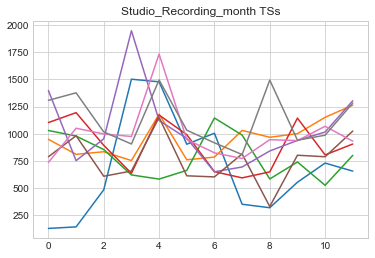

In [5083]:
plt.plot(np.squeeze(tss_studio).T)
plt.title(album_type + " TSs")
plt.show()

In [5084]:
tss_studio_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio)
tss_studio_scaled

array([[[-1.26218114],
        [-1.23050405],
        [-0.45894068],
        [ 1.83764825],
        [ 1.78334467],
        [ 0.48684668],
        [ 0.71537425],
        [-0.75987302],
        [-0.83227779],
        [-0.30281788],
        [ 0.09540837],
        [-0.07202767]],

       [[-0.05097495],
        [-0.87856829],
        [-0.73463901],
        [-1.22040032],
        [ 1.33434433],
        [-1.17842095],
        [-1.02849462],
        [ 0.44078341],
        [ 0.06296906],
        [ 0.26087181],
        [ 1.16042979],
        [ 1.83209974]],

       [[ 1.20413941],
        [ 0.94447298],
        [ 0.31312716],
        [-0.873192  ],
        [-1.06666895],
        [-0.65934906],
        [ 1.78966174],
        [ 0.99029647],
        [-1.06157745],
        [-0.26730367],
        [-1.35688437],
        [ 0.04327774]],

       [[ 0.95710085],
        [ 1.37667296],
        [-0.0065318 ],
        [-1.19147722],
        [ 1.27523795],
        [ 0.44531509],
        [-1.12231698],
     

In [5085]:
tss_studio_scaled.shape

(8, 12, 1)

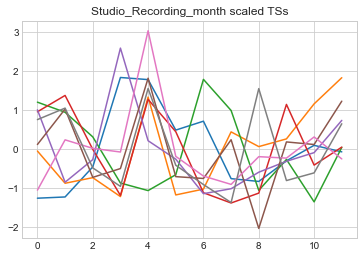

In [5086]:
plt.plot(np.squeeze(tss_studio_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5087]:
df_tss_studio_scaled = pd.DataFrame(np.squeeze(tss_studio_scaled), columns = df_studio.columns, \
                                    index = df_studio.index)
df_tss_studio_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  
track_date_created                      
2009_studio         0.095408 -0.072028  
2010_studio         1.160430  1.832100  
2011_studio        -1.356884  0.043278  
2012_studio        -0.412272  0.048796  
2013_studio        -0.092369  0.736064  
2014_studio         0.116706  1.229542  
2015_studio         0.310298 -0.253381  
2016_studio        -0.612254  0.649317

<h3>Euclidean Distance</h3>

k:  2 SSE:  6.763915433714714 Silhouette Score:  0.157716114278583

k:  3 SSE:  4.359816845966403 Silhouette Score:  0.18156769902827263

k:  4 SSE:  3.120464733218684 Silhouette Score:  0.11859090239906646

k:  5 SSE:  2.287889550466214 Silhouette Score:  0.0660424636592773

k:  6 SSE:  1.2662765057028882 Silhouette Score:  0.044902235550146545

k:  7 SSE:  0.603087455221099 Silhouette Score:  0.021959203796989457



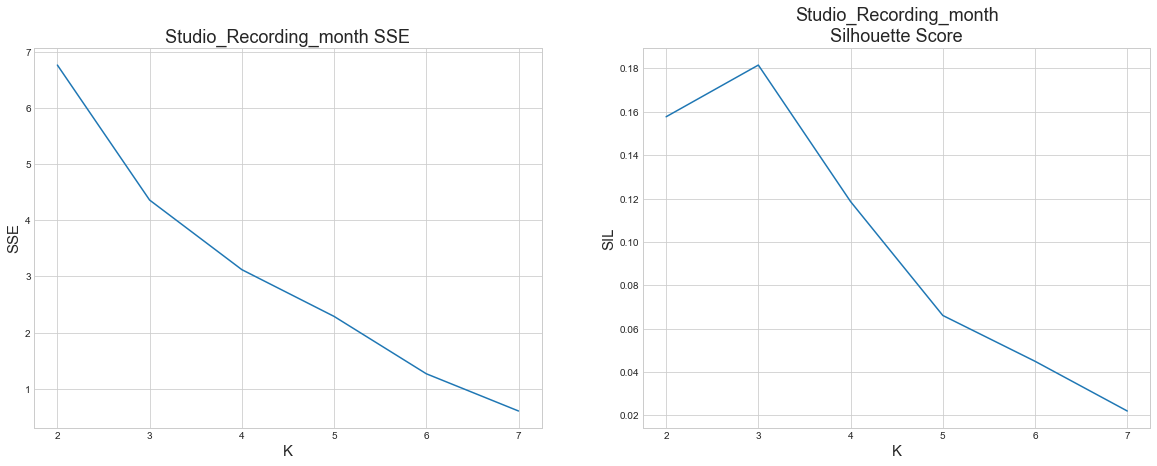

In [5088]:
find_optimal_k_kmeans(7, 'euclidean', tss_studio_scaled, False, album_type)

**We can see that best k is 3**

In [5089]:
cluster_centers_studio_eu, dict_label_studio_eu, labels_studio_eu = run_kmeans(3, 300, 10, 'euclidean', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  4.359816845966403
Silhouette Score:  0.18156769902827263


In [5090]:
cluster_insight(df_tss_studio_scaled, labels_studio_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       2  
2012_studio        -0.412272  0.048796       1  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       1  
2016_studio        -0.612254  0.649317       1

Cluster 0
 ['2009_studio', '2013_studio']

Cluster 1
 ['2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio']

Cluster 2
 ['2011_studio']



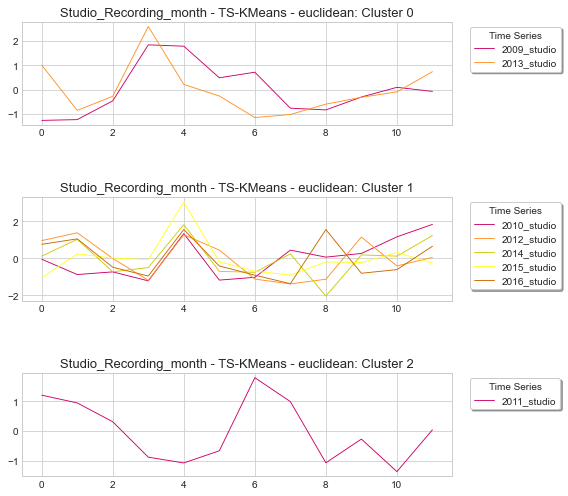

In [5091]:
analyze_clusters(labels_studio_eu, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

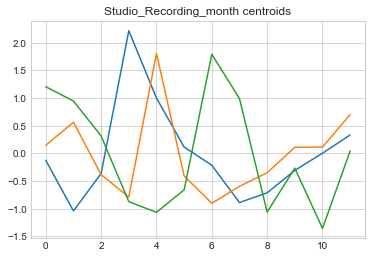

In [5092]:
plot_kmeans_centroids(cluster_centers_studio_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  2.452954365841615 Silhouette Score:  0.2792373019131862

k:  3 SSE:  1.6008000734971273 Silhouette Score:  0.20566602040719612

k:  4 SSE:  1.0131548767147136 Silhouette Score:  0.22841775888885985

k:  5 SSE:  0.6390009923014177 Silhouette Score:  0.18765038455343405

k:  6 SSE:  0.3675611554089624 Silhouette Score:  0.11401243168853448

k:  7 SSE:  0.1271078169398682 Silhouette Score:  0.07885133670774801



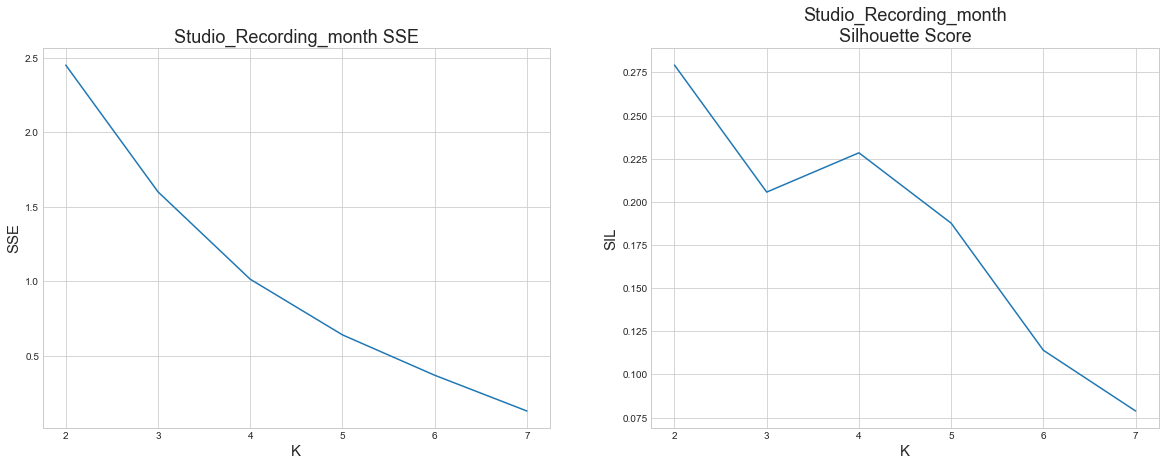

In [5093]:
find_optimal_k_kmeans(7, 'dtw', tss_studio_scaled, False, album_type)

**We can see that best k is 4**

In [5094]:
cluster_centers_studio_dtw, dict_label_studio_dtw, labels_studio_dtw = run_kmeans(4, 300, 10, 'dtw', tss_studio_scaled,\
                                                                      False)

cluster_centers_shape (4, 12, 1)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  1.0131548767147136
Silhouette Score:  0.22841775888885985


In [5095]:
cluster_insight(df_tss_studio_scaled, labels_studio_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       1  
2010_studio         1.160430  1.832100       2  
2011_studio        -1.356884  0.043278       3  
2012_studio        -0.412272  0.048796       0  
2013_studio        -0.092369  0.736064       3  
2014_studio         0.116706  1.229542       2  
2015_studio         0.310298 -0.253381       1  
2016_studio        -0.612254  0.649317       0

Cluster 0
 ['2012_studio', '2016_studio']

Cluster 1
 ['2009_studio', '2015_studio']

Cluster 2
 ['2010_studio', '2014_studio']

Cluster 3
 ['2011_studio', '2013_studio']



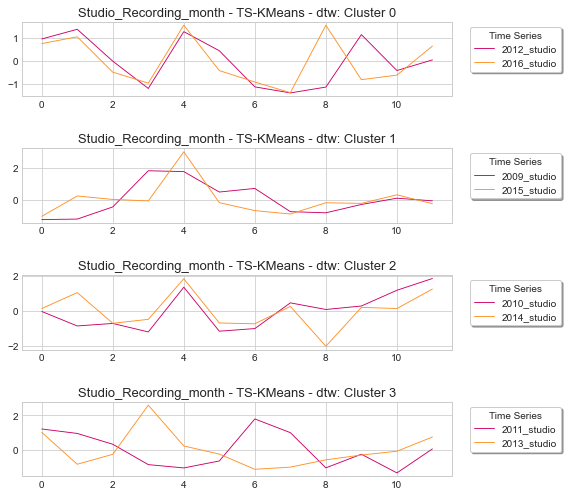

In [5096]:
analyze_clusters(labels_studio_dtw, tss_studio_scaled, df_tss_studio_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

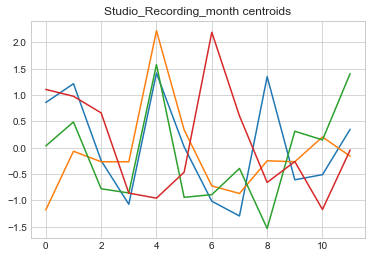

In [5097]:
plot_kmeans_centroids(cluster_centers_studio_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  54.11132346971772 Silhouette Score:  0.1577161142785831
Calinski-Harabaz:  2.1895681295913336 Davies-Bouldin:  1.2576346361634212

k:  3 SSE:  34.878534767731225 Silhouette Score:  0.18156769902827263
Calinski-Harabaz:  2.7939481389806677 Davies-Bouldin:  0.9211512929035979

k:  4 SSE:  24.963717865749473 Silhouette Score:  0.11859090239906644
Calinski-Harabaz:  2.6114883521114973 Davies-Bouldin:  1.0012564850513057

k:  5 SSE:  18.303116403729707 Silhouette Score:  0.0660424636592773
Calinski-Harabaz:  2.2764543504686 Davies-Bouldin:  0.8475387902301854

k:  6 SSE:  10.130212045623104 Silhouette Score:  0.04490223555014655
Calinski-Harabaz:  2.5163481023682097 Davies-Bouldin:  0.5600760633507118

k:  7 SSE:  4.824699641768792 Silhouette Score:  0.02195920379698945
Calinski-Harabaz:  2.3847205412951555 Davies-Bouldin:  0.40608363352297877



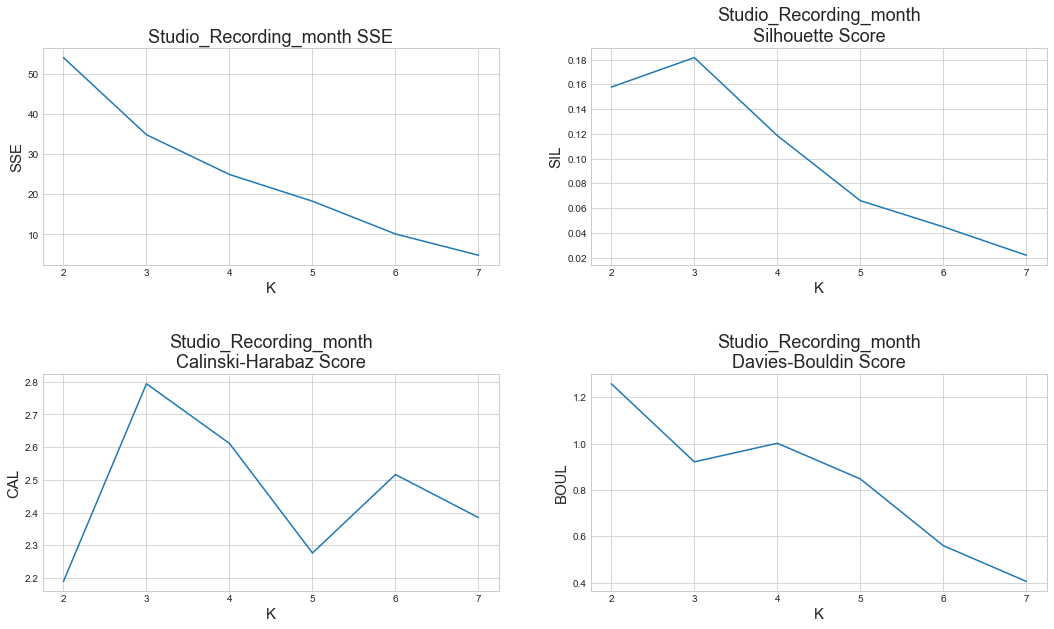

In [5098]:
find_optimal_k_kmeans(7, "", df_tss_studio_scaled, True, album_type)

In [5099]:
cluster_centers_studio_2, dict_label_studio_2, labels_studio_2 = run_kmeans(3, 300, 10, '', df_tss_studio_scaled,\
                                                                      True)

cluster_centers_shape (3, 12)

Labels:  {0: 2, 1: 5, 2: 1}

SSE:  34.878534767731225
Silhouette Score:  0.18156769902827263
Calinski - Harabaz Score:  2.7939481389806677
Davies - Bouldin Score:  0.9211512929035979


In [5100]:
cluster_insight(df_tss_studio_scaled, labels_studio_2)

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       0  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       2  
2012_studio        -0.412272  0.048796       1  
2013_studio        -0.092369  0.736064       0  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       1  
2016_studio        -0.612254  0.649317       1

Cluster 0
 ['2009_studio', '2013_studio']

Cluster 1
 ['2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio']

Cluster 2
 ['2011_studio']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5101]:
F = [list(calculate_features(x).values())for x in tss_studio_scaled]

In [5102]:
find_optimal_k_kmeans(7, "", F, True, album_type)

k:  2 SSE:  6.517069556225921 Silhouette Score:  0.6509977734702348
Calinski-Harabaz:  22.723419077575475 Davies-Bouldin:  0.14633834762401604

k:  3 SSE:  1.4199837411650793 Silhouette Score:  0.5351613666005417
Calinski-Harabaz:  52.428011554671265 Davies-Bouldin:  0.14309303793911696



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  4 SSE:  0.4981741699294301 Silhouette Score:  0.34695847914479216
Calinski-Harabaz:  82.16826167786218 Davies-Bouldin:  0.4239607745195646

k:  5 SSE:  0.1821071118507948 Silhouette Score:  0.2693343405115574
Calinski-Harabaz:  127.74067103880998 Davies-Bouldin:  0.1612471232762883

k:  6 SSE:  0.042764944823801374 Silhouette Score:  0.19502816445845017
Calinski-Harabaz:  291.4161448860354 Davies-Bouldin:  0.1443423480444526

k:  7 SSE:  0.012324282022324 Silhouette Score:  0.05860787988135706
Calinski-Harabaz:  421.74774695936884 Davies-Bouldin:  0.16706607194721634



In [5103]:
cluster_centers_studio_fb, dict_label_studio_fb, labels_studio_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 1, 1: 6, 2: 1}

SSE:  1.4199837411650793
Silhouette Score:  0.5351613666005417
Calinski - Harabaz Score:  52.428011554671265
Davies - Bouldin Score:  0.14309303793911696


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

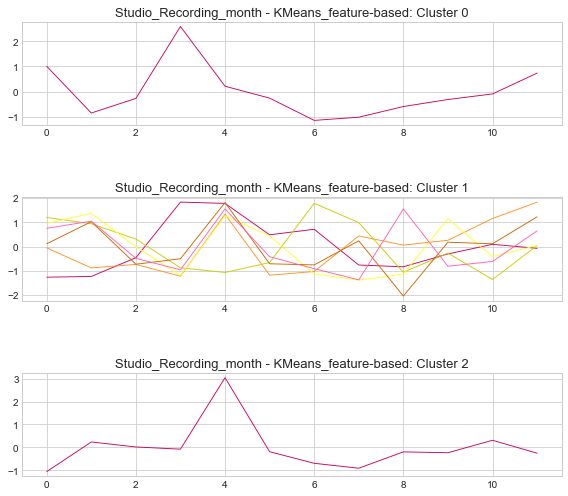

In [5104]:
analyze_clusters_fb(labels_studio_fb, tss_studio_scaled, album_type, 'KMeans_feature-based', False)

In [5105]:
plot_mean_values(labels_studio_fb, tss_studio_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5106]:
M = pairwise_distances(tss_studio_scaled.reshape(tss_studio_scaled.shape[0], tss_studio_scaled.shape[1]), \
                       metric=cdm_dist)

In [5107]:
print(tss_studio_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


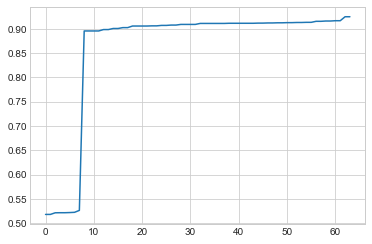

In [5108]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5109]:
dbscan_compression_studio = DBSCAN(eps=0.90, min_samples=5, metric='precomputed')
dbscan_compression_studio.fit(M)

DBSCAN(eps=0.9, metric='precomputed')

In [5110]:
dbscan_compression_studio.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5111]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_scaled)
X_paa.shape

(8, 6, 1)

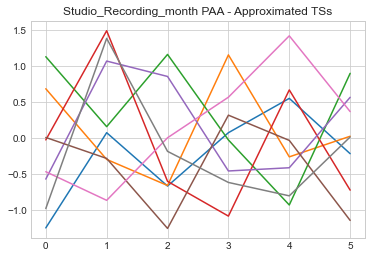

In [5112]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  1.8333894193762004 Silhouette Score:  0.3025371607589762

k:  3 SSE:  1.12807646185304 Silhouette Score:  0.19907458695342228

k:  4 SSE:  0.6681571628355313 Silhouette Score:  0.26970576386545825

k:  5 SSE:  0.355313505203969 Silhouette Score:  0.27725629074898733

k:  6 SSE:  0.1490385087036879 Silhouette Score:  0.2327888307523237

k:  7 SSE:  0.022082994804375956 Silhouette Score:  0.16465671617338806



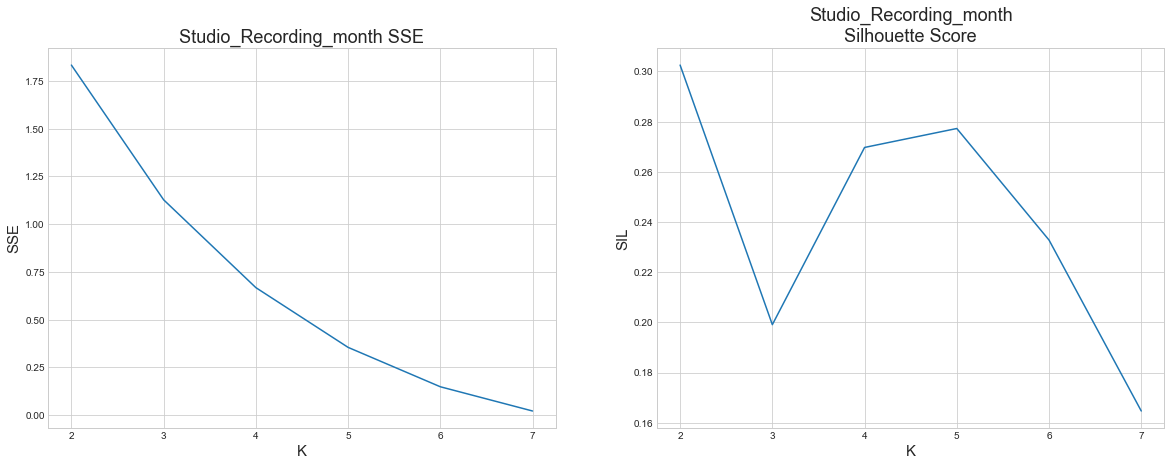

In [5113]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [5114]:
cluster_centers_studio_paa, dict_label_studio_paa, labels_studio_paa = run_kmeans(5, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (5, 6, 1)

Labels:  {0: 2, 1: 2, 2: 1, 3: 2, 4: 1}

SSE:  0.355313505203969
Silhouette Score:  0.27725629074898733


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.246343  0.689354  1.135096 -0.022249 -0.567548   
2010_studio        -0.464772 -0.977520  0.077962 -0.293856  0.161920   
2011_studio         1.074306 -0.280032 -0.863009  1.389979 -0.664441   
2012_studio         1.166887 -0.599005  0.860277 -1.253721  0.007300   
2013_studio         0.077936  1.160383 -0.023092 -1.082447 -0.454628   
2014_studio         0.571743 -0.614182  0.555239 -0.258169 -0.927756   
2015_studio        -0.409730 -0.029144  1.425313 -0.800603 -0.214294   
2016_studio         0.903770 -0.721305  0.570202 -1.142542  0.371344   

                           5  Labels  
track_date_created                    
2009_studio         0.011690       0  
2010_studio         1.496265       1  
2011_studio        -0.656803       2  
2012_studio        -0.181738       3  
2013_studio         0.321848       4  
2014_studio         0.673124       1  
2015_studio         0.028458       0  
2016_studio         0.018532       3


Cluster 0
 ['2009_studio', '2015_studio']

Cluster 1
 ['2010_studio', '2014_studio']

Cluster 2
 ['2011_studio']

Cluster 3
 ['2012_studio', '2016_studio']

Cluster 4
 ['2013_studio']




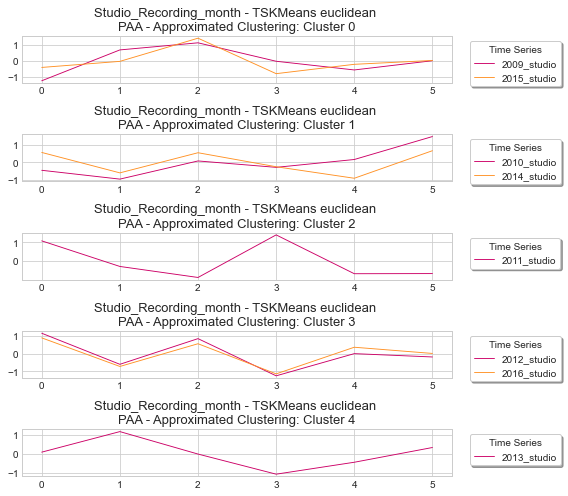

In [5115]:
analyze_approximated_clusters(labels_studio_paa, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

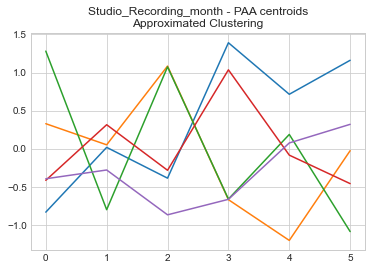

In [5116]:
plot_centroids_approximated(cluster_centers_studio_paa, X_paa, album_type, 'PAA')

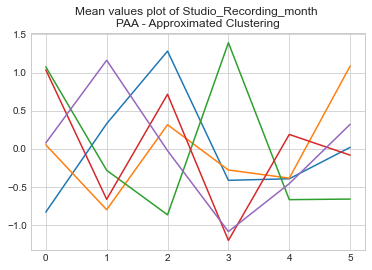

In [5117]:
plot_mean_values_approximated(labels_studio_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

In [5118]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

k:  2 SSE:  0.9726322712415012 Silhouette Score:  0.2510109633928281

k:  3 SSE:  0.6097093196765341 Silhouette Score:  0.22130565714822575

k:  4 SSE:  0.4357905785742292 Silhouette Score:  0.10937791375777123

k:  5 SSE:  0.2658860170897489 Silhouette Score:  0.13411299940604415

k:  6 SSE:  0.09462908364478169 Silhouette Score:  0.17226853215833027

k:  7 SSE:  0.022082994804375956 Silhouette Score:  0.12542038877155232



In [5119]:
cluster_centers_studio_paa_dtw, dict_label_studio_paa_dtw, labels_studio_paa_dtw = run_kmeans(3, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 4, 1: 1, 2: 3}

SSE:  0.6097093196765341
Silhouette Score:  0.22130565714822575


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.246343  0.689354  1.135096 -0.022249 -0.567548   
2010_studio        -0.464772 -0.977520  0.077962 -0.293856  0.161920   
2011_studio         1.074306 -0.280032 -0.863009  1.389979 -0.664441   
2012_studio         1.166887 -0.599005  0.860277 -1.253721  0.007300   
2013_studio         0.077936  1.160383 -0.023092 -1.082447 -0.454628   
2014_studio         0.571743 -0.614182  0.555239 -0.258169 -0.927756   
2015_studio        -0.409730 -0.029144  1.425313 -0.800603 -0.214294   
2016_studio         0.903770 -0.721305  0.570202 -1.142542  0.371344   

                           5  Labels  
track_date_created                    
2009_studio         0.011690       0  
2010_studio         1.496265       1  
2011_studio        -0.656803       2  
2012_studio        -0.181738       2  
2013_studio         0.321848       0  
2014_studio         0.673124       0  
2015_studio         0.028458       0  
2016_studio         0.018532       2


Cluster 0
 ['2009_studio', '2013_studio', '2014_studio', '2015_studio']

Cluster 1
 ['2010_studio']

Cluster 2
 ['2011_studio', '2012_studio', '2016_studio']




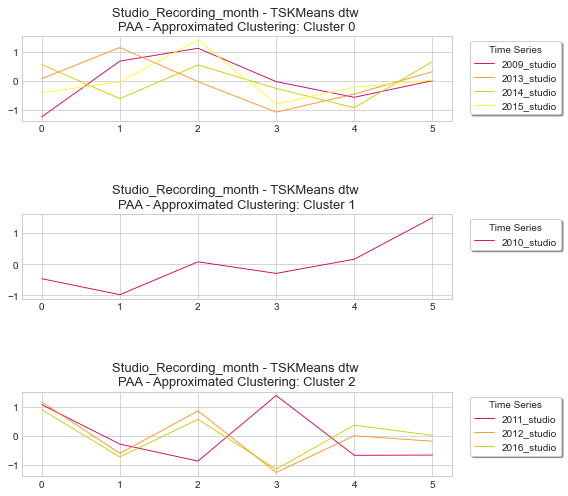

In [5120]:
analyze_approximated_clusters(labels_studio_paa_dtw, X_paa, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

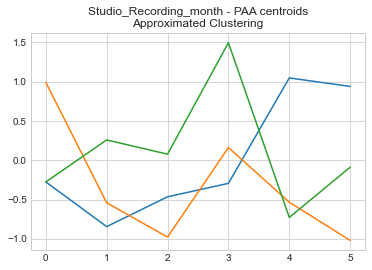

In [5121]:
plot_centroids_approximated(cluster_centers_studio_paa_dtw, X_paa, album_type, 'PAA')

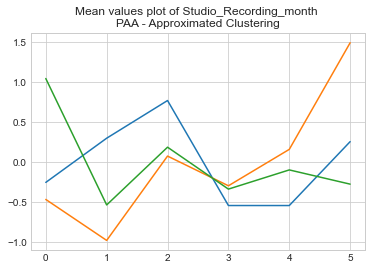

In [5122]:
plot_mean_values_approximated(labels_studio_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5123]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
#n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg)

X_sax1d = one_d_sax.fit_transform(tss_studio_scaled)
X_sax1d.shape

(8, 6, 2)

In [5124]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  21.5625 Silhouette Score:  0.14541605108790565

k:  3 SSE:  14.6875 Silhouette Score:  0.15723167344914835

k:  4 SSE:  9.104166666666668 Silhouette Score:  0.1995352129435753

k:  5 SSE:  5.5625 Silhouette Score:  0.17846081539882316

k:  6 SSE:  2.9374999999999996 Silhouette Score:  0.14154364328576013

k:  7 SSE:  1.1249999999999998 Silhouette Score:  0.06214116405152744



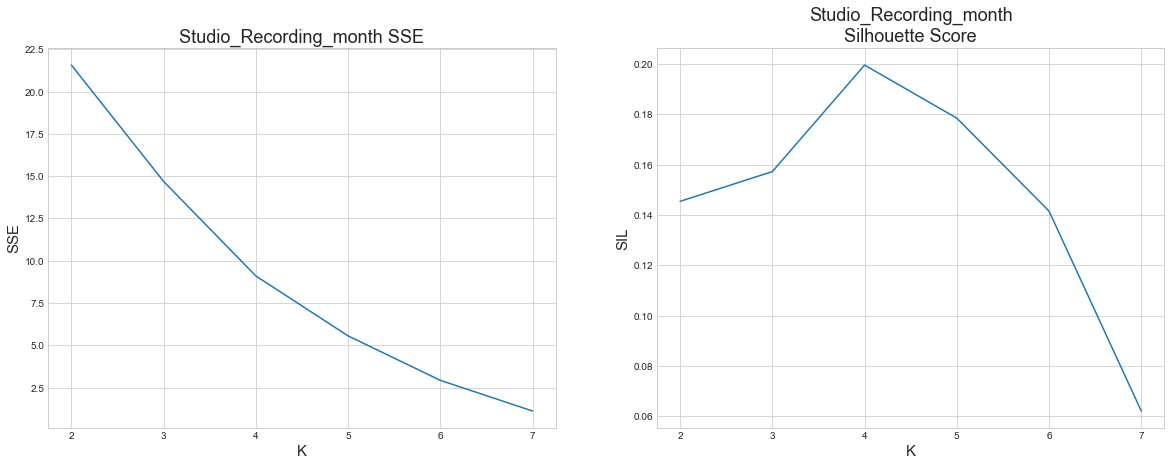

In [5125]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [5126]:
cluster_centers_studio_sax1d, dict_label_studio_sax1d, \
labels_studio_sax1d = run_kmeans(4, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 1, 1: 2, 2: 3, 3: 2}

SSE:  9.104166666666668
Silhouette Score:  0.1995352129435753


In [5127]:
#analyze_approximated_clusters(labels_studio_sax1d, X_sax1d, df_tss_studio_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', False)

In [5128]:
#plot_centroids_approximated(cluster_centers_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

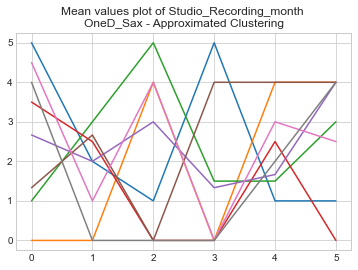

In [5129]:
plot_mean_values_approximated(labels_studio_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  15.777777777777777 Silhouette Score:  0.1902861962142753

k:  3 SSE:  11.63125 Silhouette Score:  0.13340121388200074

k:  4 SSE:  7.895833333333333 Silhouette Score:  0.1851468526126538

k:  5 SSE:  4.979166666666666 Silhouette Score:  0.176768452837558

k:  6 SSE:  2.520833333333333 Silhouette Score:  0.14903012208195776

k:  7 SSE:  0.7083333333333334 Silhouette Score:  0.10230891998352684



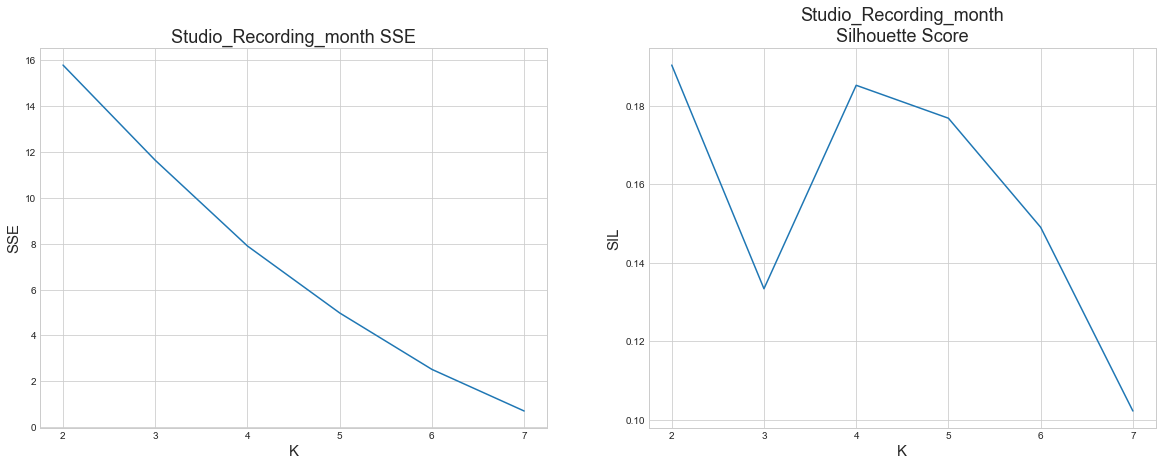

In [5130]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [5131]:
cluster_centers_studio_sax1d_dtw, dict_label_studio_sax1d_dtw, \
labels_studio_sax1d_dtw = run_kmeans(4, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (4, 6, 2)

Labels:  {0: 2, 1: 2, 2: 2, 3: 2}

SSE:  7.895833333333333
Silhouette Score:  0.1851468526126538


In [5132]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [5133]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

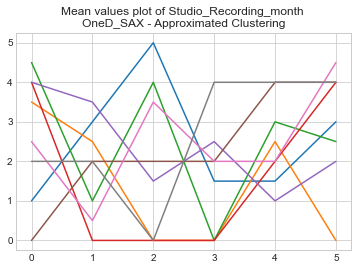

In [5134]:
plot_mean_values_approximated(labels_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5135]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_scaled)

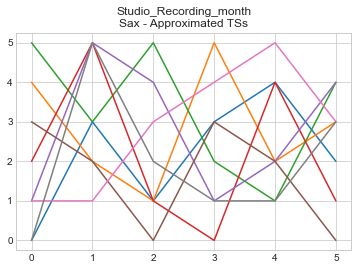

In [5136]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  7.9642857142857135 Silhouette Score:  0.29092386702258843

k:  3 SSE:  4.8375 Silhouette Score:  0.22142459098583864

k:  4 SSE:  3.15625 Silhouette Score:  0.17751473740761925

k:  5 SSE:  1.71875 Silhouette Score:  0.13683265673602174

k:  6 SSE:  0.6875 Silhouette Score:  0.15909277468026742

k:  7 SSE:  0.12500000000000003 Silhouette Score:  0.13847096621545396



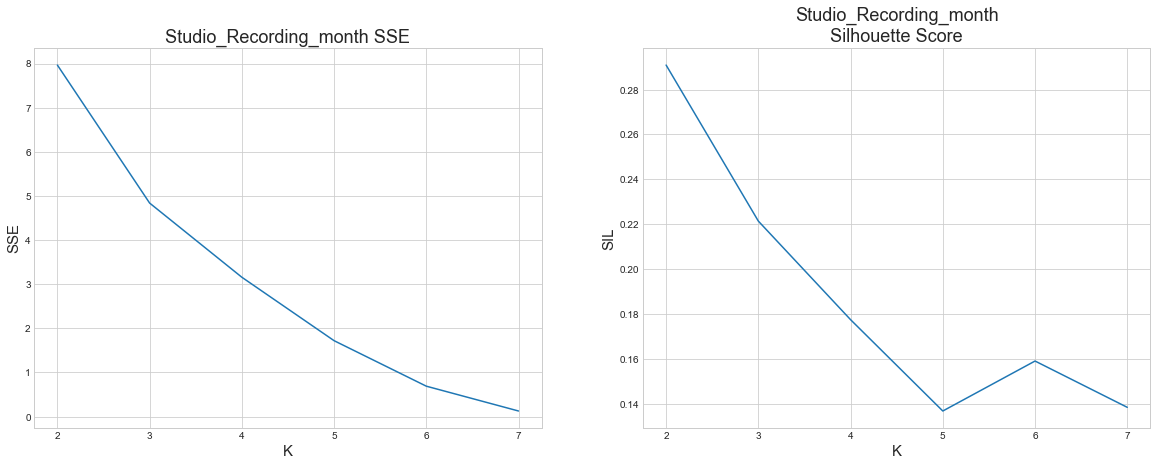

In [5137]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [5138]:
cluster_centers_studio_sax, dict_label_studio_sax, \
labels_studio_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 5, 1: 1, 2: 2}

SSE:  4.8375
Silhouette Score:  0.22142459098583864


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         0  4  5  2  1  3       2
2010_studio         1  0  3  2  3  5       0
2011_studio         5  2  1  5  1  1       1
2012_studio         5  1  4  0  3  2       0
2013_studio         3  5  2  0  1  3       2
2014_studio         4  1  4  2  1  4       0
2015_studio         2  2  5  1  2  3       0
2016_studio         4  1  4  0  3  3       0


Cluster 0
 ['2010_studio', '2012_studio', '2014_studio', '2015_studio', '2016_studio']

Cluster 1
 ['2011_studio']

Cluster 2
 ['2009_studio', '2013_studio']




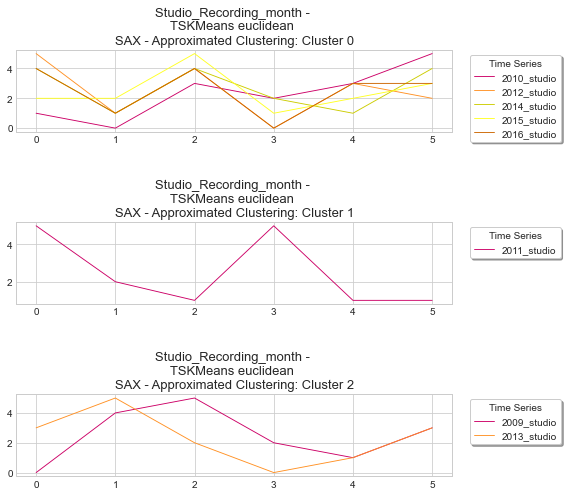

In [5139]:
analyze_approximated_clusters(labels_studio_sax, X_sax, df_tss_studio_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean \nSAX - Approximated Clustering', False)

In [5140]:
plot_centroids_approximated(cluster_centers_studio_sax, X_sax, album_type, 'Sax')

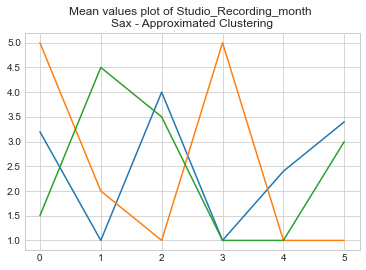

In [5141]:
plot_mean_values_approximated(labels_studio_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  3.616071428571429 Silhouette Score:  0.31851853374862504

k:  3 SSE:  2.5083333333333333 Silhouette Score:  0.15248685987507216

k:  4 SSE:  1.75 Silhouette Score:  0.08127245586653455

k:  5 SSE:  1.0625 Silhouette Score:  0.1384294088885855

k:  6 SSE:  0.39583333333333337 Silhouette Score:  0.1786940135791408

k:  7 SSE:  0.12500000000000003 Silhouette Score:  0.1206846895218939



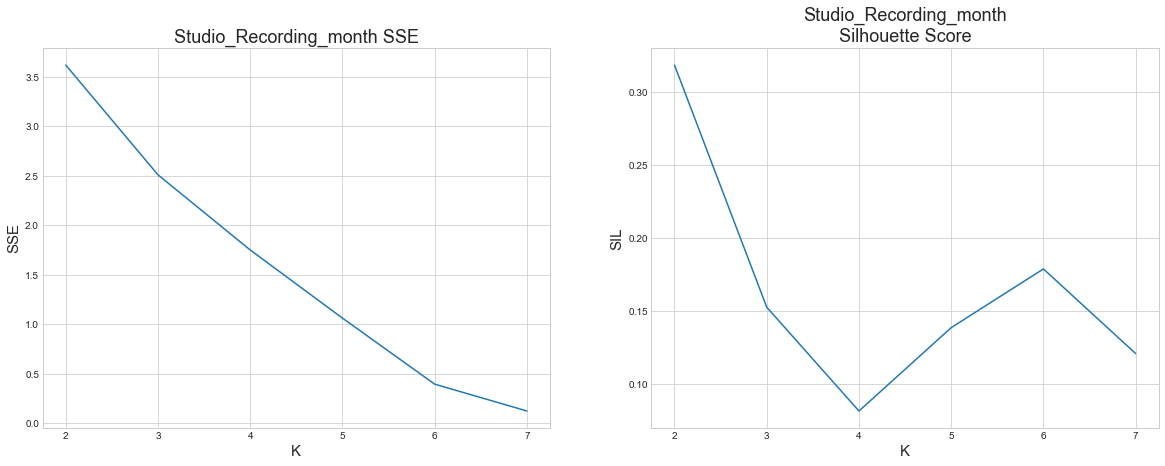

In [5142]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

In [5143]:
cluster_centers_studio_sax_dtw, dict_label_studio_sax_dtw, \
labels_studio_sax_dtw = run_kmeans(6, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (6, 6, 1)

Labels:  {0: 2, 1: 1, 2: 2, 3: 1, 4: 1, 5: 1}

SSE:  0.39583333333333337
Silhouette Score:  0.1786940135791408


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         0  4  5  2  1  3       5
2010_studio         1  0  3  2  3  5       3
2011_studio         5  2  1  5  1  1       4
2012_studio         5  1  4  0  3  2       2
2013_studio         3  5  2  0  1  3       0
2014_studio         4  1  4  2  1  4       1
2015_studio         2  2  5  1  2  3       0
2016_studio         4  1  4  0  3  3       2


Cluster 0
 ['2013_studio', '2015_studio']

Cluster 1
 ['2014_studio']

Cluster 2
 ['2012_studio', '2016_studio']

Cluster 3
 ['2010_studio']

Cluster 4
 ['2011_studio']

Cluster 5
 ['2009_studio']




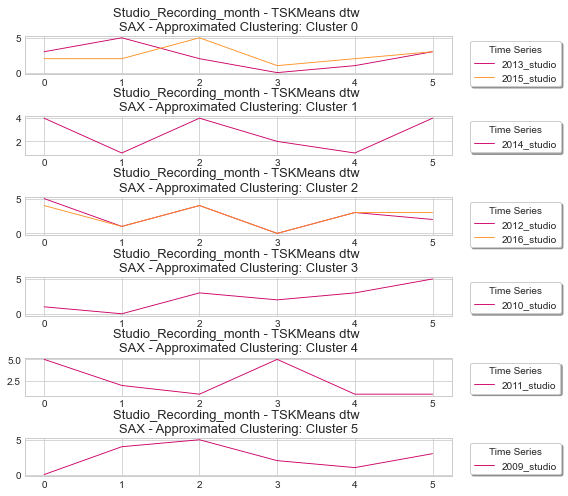

In [5144]:
analyze_approximated_clusters(labels_studio_sax_dtw, X_sax, df_tss_studio_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

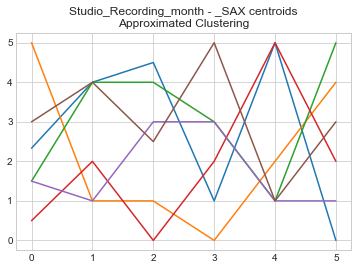

In [5145]:
plot_centroids_approximated(cluster_centers_studio_sax_dtw, X_sax, album_type, '_SAX')

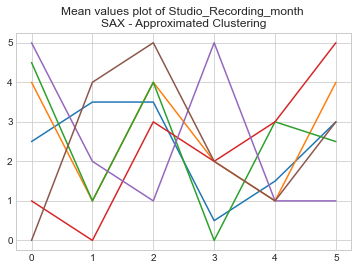

In [5146]:
plot_mean_values_approximated(labels_studio_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Live_Recording</h1>

In [5147]:
album_type = "Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5148]:
df_live

January  February  March  April  May  June  July  August  \
track_date_created                                                             
2009_live               275       205    327    385  186   243   225     148   
2010_live               162       148     28     95   64   150   202     103   
2011_live                77       100     62    144  111   263   133     154   
2012_live                31       214    181    114  268   123   121     115   
2013_live                41        92    129     60   58    94   147      73   
2014_live               110       109     37     35   61    17    27       7   
2015_live                62        65     20     54   38    22    30     116   
2016_live                59        91     49     28   50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [5149]:
df_live.shape

(8, 12)

In [5150]:
tss_live = to_time_series_dataset(df_live.values)
tss_live

array([[[275.],
        [205.],
        [327.],
        [385.],
        [186.],
        [243.],
        [225.],
        [148.],
        [111.],
        [170.],
        [120.],
        [188.]],

       [[162.],
        [148.],
        [ 28.],
        [ 95.],
        [ 64.],
        [150.],
        [202.],
        [103.],
        [109.],
        [ 94.],
        [ 68.],
        [ 61.]],

       [[ 77.],
        [100.],
        [ 62.],
        [144.],
        [111.],
        [263.],
        [133.],
        [154.],
        [218.],
        [121.],
        [192.],
        [151.]],

       [[ 31.],
        [214.],
        [181.],
        [114.],
        [268.],
        [123.],
        [121.],
        [115.],
        [ 46.],
        [101.],
        [ 39.],
        [ 68.]],

       [[ 41.],
        [ 92.],
        [129.],
        [ 60.],
        [ 58.],
        [ 94.],
        [147.],
        [ 73.],
        [ 39.],
        [ 51.],
        [ 39.],
        [ 89.]],

       [[110.],
        [109.]

In [5151]:
tss_live.shape

(8, 12, 1)

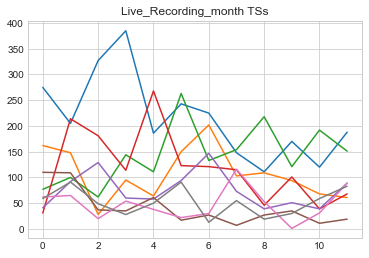

In [5152]:
plt.plot(np.squeeze(tss_live).T)
plt.title(album_type + " TSs")
plt.show()

In [5153]:
tss_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_live)
tss_live_scaled

array([[[ 0.76111948],
        [-0.13056861],
        [ 1.42351635],
        [ 2.16234362],
        [-0.37259824],
        [ 0.35349064],
        [ 0.12419941],
        [-0.85665749],
        [-1.32797834],
        [-0.57641266],
        [-1.21333273],
        [-0.34712144]],

       [[ 1.14599914],
        [ 0.85429027],
        [-1.6460715 ],
        [-0.25003618],
        [-0.89596297],
        [ 0.89596297],
        [ 1.97945307],
        [-0.08334539],
        [ 0.0416727 ],
        [-0.27087252],
        [-0.81261757],
        [-0.95847201]],

       [[-1.20396537],
        [-0.78963314],
        [-1.47418203],
        [ 0.00300241],
        [-0.59147426],
        [ 2.14672129],
        [-0.19515648],
        [ 0.18314685],
        [ 1.33607129],
        [-0.41132981],
        [ 0.86769574],
        [ 0.12910352]],

       [[-1.26257407],
        [ 1.38052665],
        [ 0.90390193],
        [-0.06379068],
        [ 2.16045801],
        [ 0.06619788],
        [ 0.03731153],
     

In [5154]:
tss_live_scaled.shape

(8, 12, 1)

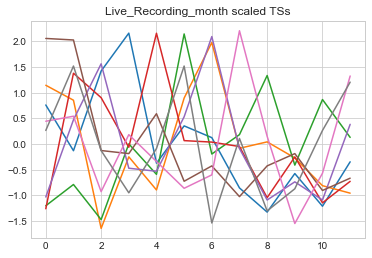

In [5155]:
plt.plot(np.squeeze(tss_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5156]:
df_tss_live_scaled = pd.DataFrame(np.squeeze(tss_live_scaled), columns = df_live.columns, \
                                    index = df_live.index)
df_tss_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  
track_date_created                      
2009_live          -1.213333 -0.347121  
2010_live          -0.812618 -0.958472  
2011_live           0.867696  0.129104  
2012_live          -1.147029 -0.728177  
2013_live          -1.092020  0.383683  
2014_live          -0.905908 -0.666329  
2015_live          -0.569309  1.326572  
2016_live           0.264888  1.206714

<h3>Euclidean Distance</h3>

In [5157]:
find_optimal_k_kmeans(7, 'euclidean', tss_live_scaled, False, album_type)

k:  2 SSE:  7.576410329087443 Silhouette Score:  0.12055926099431188

k:  3 SSE:  5.711004933918124 Silhouette Score:  0.11059446248585553

k:  4 SSE:  4.16162166495768 Silhouette Score:  0.10609282254606618

k:  5 SSE:  3.0168411103481696 Silhouette Score:  0.06877936450062136

k:  6 SSE:  1.93898629458928 Silhouette Score:  0.03832610439980337

k:  7 SSE:  0.9161073761069961 Silhouette Score:  0.013981768177269665



**We can see that best k is 3**

In [5158]:
cluster_centers_live_eu, dict_label_live_eu, labels_live_eu = run_kmeans(3, 300, 10, 'euclidean', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  5.711004933918124
Silhouette Score:  0.11059446248585553


In [5159]:
cluster_insight(df_tss_live_scaled, labels_live_eu)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       1  
2010_live          -0.812618 -0.958472       0  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       0  
2015_live          -0.569309  1.326572       2  
2016_live           0.264888  1.206714       2

Cluster 0
 ['2010_live', '2014_live']

Cluster 1
 ['2009_live', '2012_live', '2013_live']

Cluster 2
 ['2011_live', '2015_live', '2016_live']



In [5160]:
analyze_clusters(labels_live_eu, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - euclidean', False)

**Centroids**

In [5161]:
plot_kmeans_centroids(cluster_centers_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  2.921664799521822 Silhouette Score:  0.18345719522578402

k:  3 SSE:  2.2982801162575237 Silhouette Score:  0.08034772932309281

k:  4 SSE:  1.6288545429855867 Silhouette Score:  0.15988155108383106

k:  5 SSE:  1.049478988617276 Silhouette Score:  0.134034261010729

k:  6 SSE:  0.5007982009391345 Silhouette Score:  0.10290879814272229

k:  7 SSE:  0.22292418850100604 Silhouette Score:  0.03721932964366686



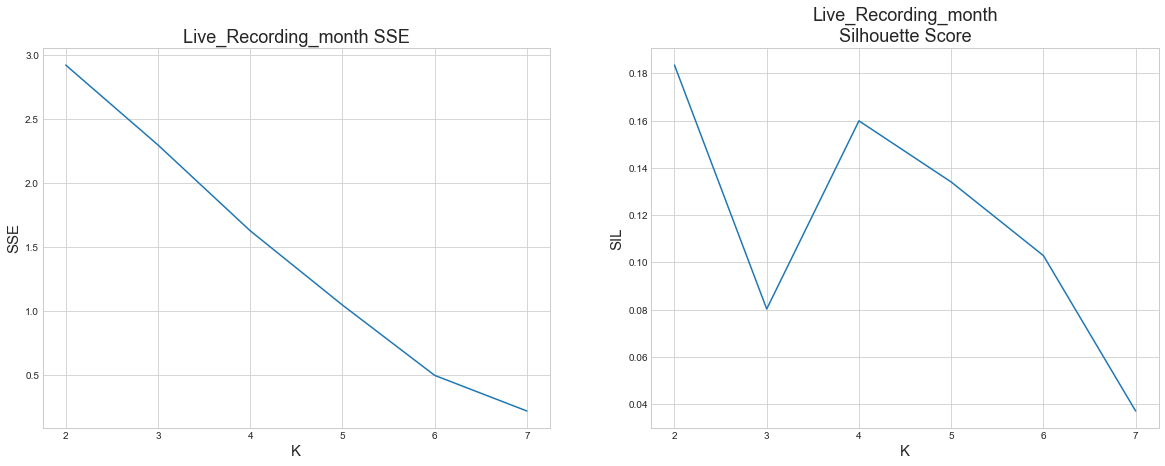

In [5162]:
find_optimal_k_kmeans(7, 'dtw', tss_live_scaled, False, album_type)

**We can see that best k is 4**

In [5163]:
cluster_centers_live_dtw, dict_label_live_dtw, labels_live_dtw = run_kmeans(4, 300, 10, 'dtw', tss_live_scaled,\
                                                                      False)

cluster_centers_shape (4, 12, 1)

Labels:  {0: 2, 1: 2, 2: 3, 3: 1}

SSE:  1.6288545429855867
Silhouette Score:  0.15988155108383106


In [5164]:
cluster_insight(df_tss_live_scaled, labels_live_dtw)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       1  
2010_live          -0.812618 -0.958472       1  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       2  
2013_live          -1.092020  0.383683       2  
2014_live          -0.905908 -0.666329       3  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2009_live', '2010_live']

Cluster 2
 ['2011_live', '2012_live', '2013_live']

Cluster 3
 ['2014_live']



In [5165]:
analyze_clusters(labels_live_dtw, tss_live_scaled, df_tss_live_scaled, album_type, 'TS-KMeans - dtw', False)

**Centroids**

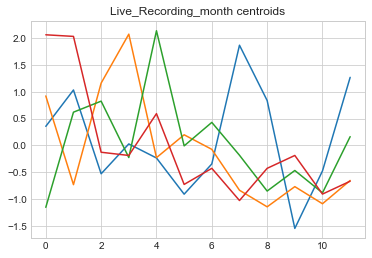

In [5166]:
plot_kmeans_centroids(cluster_centers_live_dtw, album_type)

<h3>KMeans sklearn</h3>

In [5167]:
find_optimal_k_kmeans(7, "", df_tss_live_scaled, True, album_type)

k:  2 SSE:  60.611282632699535 Silhouette Score:  0.12055926099431191
Calinski-Harabaz:  2.11185479558663 Davies-Bouldin:  1.6161092286481153

k:  3 SSE:  45.68803947134499 Silhouette Score:  0.11059446248585549
Calinski-Harabaz:  1.9839408863878727 Davies-Bouldin:  1.283488289836045

k:  4 SSE:  33.29297331966144 Silhouette Score:  0.10609282254606615
Calinski-Harabaz:  1.9484397301093932 Davies-Bouldin:  1.0227284038211921

k:  5 SSE:  24.13472888278536 Silhouette Score:  0.06877936450062133
Calinski-Harabaz:  1.7964856373496236 Davies-Bouldin:  0.8379601537636902

k:  6 SSE:  15.51189035671424 Silhouette Score:  0.03832610439980336
Calinski-Harabaz:  1.7130883573146778 Davies-Bouldin:  0.6490939545719151

k:  7 SSE:  7.32885900885597 Silhouette Score:  0.013981768177269704
Calinski-Harabaz:  1.6968564088618001 Davies-Bouldin:  0.4467200061252031



In [5168]:
cluster_centers_live_2, dict_label_live_2, labels_live_2 = run_kmeans(3, 300, 10, '', df_tss_live_scaled,\
                                                                      True)

cluster_centers_shape (3, 12)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  45.68803947134499
Silhouette Score:  0.11059446248585549
Calinski - Harabaz Score:  1.9839408863878727
Davies - Bouldin Score:  1.283488289836045


In [5169]:
cluster_insight(df_tss_live_scaled, labels_live_2)

January  February     March     April       May  \
track_date_created                                                     
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_live          -1.213333 -0.347121       1  
2010_live          -0.812618 -0.958472       0  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       1  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       0  
2015_live          -0.569309  1.326572       2  
2016_live           0.264888  1.206714       2

Cluster 0
 ['2010_live', '2014_live']

Cluster 1
 ['2009_live', '2012_live', '2013_live']

Cluster 2
 ['2011_live', '2015_live', '2016_live']



<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5170]:
F = [list(calculate_features(x).values())for x in tss_live_scaled]

In [5171]:
find_optimal_k_kmeans(7, "", F, True, album_type)

k:  2 SSE:  0.5867461839360113 Silhouette Score:  0.5547730447022219
Calinski-Harabaz:  11.135588583607674 Davies-Bouldin:  0.5377245198205214

k:  3 SSE:  0.18707759732638274 Silhouette Score:  0.5362288517696934
Calinski-Harabaz:  19.8932059802531 Davies-Bouldin:  0.3520338138239591

k:  4 SSE:  0.08531024438172717 Silhouette Score:  0.4022433864099874
Calinski-Harabaz:  24.8566728123942 Davies-Bouldin:  0.16827535395643659

k:  5 SSE:  0.03333116578768743 Silhouette Score:  0.22713474346699902
Calinski-Harabaz:  36.9558564159318 Davies-Bouldin:  0.20795047493180613



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  6 SSE:  0.007730206418420795 Silhouette Score:  0.20054455983892125
Calinski-Harabaz:  86.3095535506046 Davies-Bouldin:  0.16263231835250871

k:  7 SSE:  0.0006827460670547921 Silhouette Score:  0.16150318026780855
Calinski-Harabaz:  408.8938780335574 Davies-Bouldin:  0.08994000034071557



In [5172]:
cluster_centers_live_fb, dict_label_live_fb, labels_live_fb = run_kmeans(3, 300, 10, "", F, True)

cluster_centers_shape (3, 5)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  0.18707759732638274
Silhouette Score:  0.5362288517696934
Calinski - Harabaz Score:  19.8932059802531
Davies - Bouldin Score:  0.3520338138239591


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

In [5173]:
analyze_clusters_fb(labels_live_fb, tss_live_scaled, album_type, 'KMeans_feature-based', False)

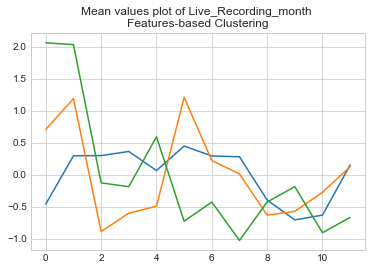

In [5174]:
plot_mean_values(labels_live_fb, tss_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5175]:
M = pairwise_distances(tss_live_scaled.reshape(tss_live_scaled.shape[0], tss_live_scaled.shape[1]), \
                       metric=cdm_dist)

In [5176]:
print(tss_live_scaled.shape, M.shape)

(8, 12, 1) (8, 8)


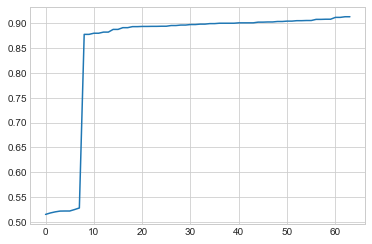

In [5177]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5178]:
dbscan_compression_live = DBSCAN(eps=0.88, min_samples=5, metric='precomputed')
dbscan_compression_live.fit(M)

DBSCAN(eps=0.88, metric='precomputed')

In [5179]:
dbscan_compression_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5180]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_live_scaled)

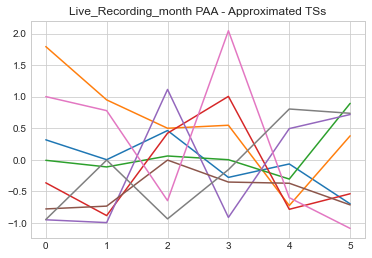

In [5181]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + " PAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  2.0347147981747216 Silhouette Score:  0.13955520335978686

k:  3 SSE:  1.4471031683855076 Silhouette Score:  0.147920067810985

k:  4 SSE:  0.951878443296527 Silhouette Score:  0.14288257833031034

k:  5 SSE:  0.6081354196574289 Silhouette Score:  0.117564378463036

k:  6 SSE:  0.35704251637805257 Silhouette Score:  0.07047578889589656

k:  7 SSE:  0.15178932243655255 Silhouette Score:  0.01944364936810527



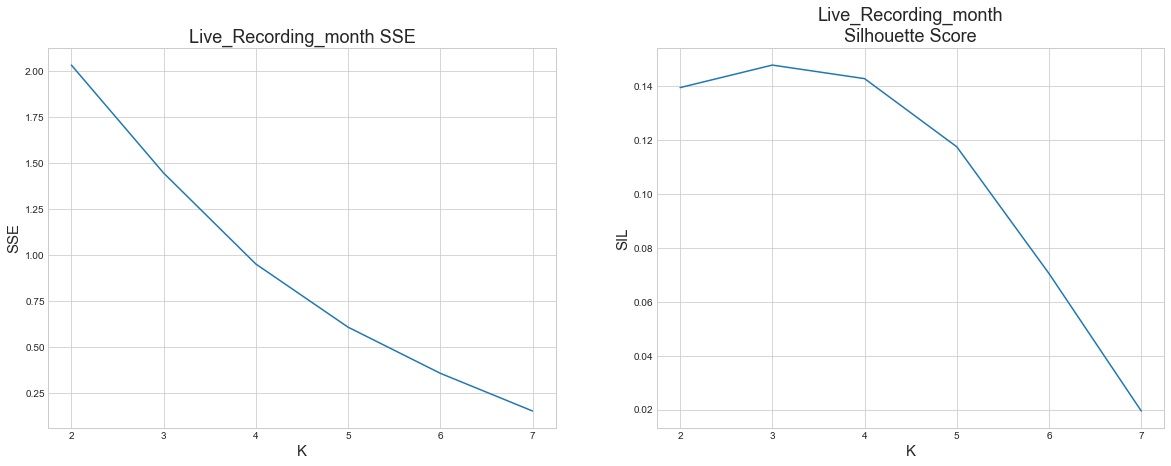

In [5182]:
find_optimal_k_kmeans(7, 'euclidean', X_paa, False, album_type)

In [5183]:
cluster_centers_live_paa, dict_label_live_paa, labels_live_paa = run_kmeans(3, 300, 10, 'euclidean', X_paa,\
                                                                      False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 2, 1: 3, 2: 3}

SSE:  1.4471031683855076
Silhouette Score:  0.147920067810985


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.315275  1.792930 -0.009554 -0.366229 -0.952195   
2010_live           1.000145 -0.948054  0.000000  0.948054 -0.114600   
2011_live          -0.996799 -0.735590  0.777624 -0.006005  0.462371   
2012_live           0.058976  0.420056  1.113328 -0.006018 -0.648739   
2013_live          -0.280384  0.546010  0.000000  1.003478 -0.914936   
2014_live           2.043907 -0.157224 -0.067382 -0.726223 -0.306960   
2015_live           0.493038 -0.373183 -0.601997  0.803570 -0.700059   
2016_live           0.892772 -0.539588  0.716180 -0.716180 -1.088986   

                           5  Labels  
track_date_created                    
2009_live          -0.780227       2  
2010_live          -0.885545       1  
2011_live           0.498400       1  
2012_live          -0.937603       2  
2013_live          -0.354169       2  
2014_live          -0.786118       0  
2015_live           0.378631       1  
2016_live           0.735801       0


Cluster 0
 ['2014_live', '2016_live']

Cluster 1
 ['2010_live', '2011_live', '2015_live']

Cluster 2
 ['2009_live', '2012_live', '2013_live']




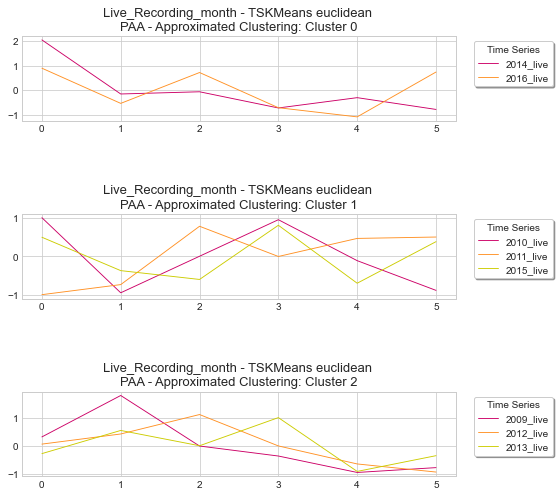

In [5184]:
analyze_approximated_clusters(labels_live_paa, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans euclidean \nPAA - Approximated Clustering', False)

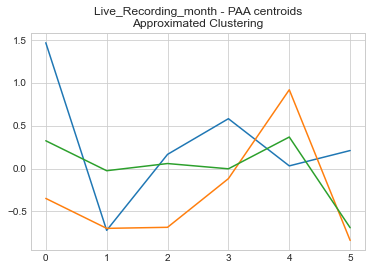

In [5185]:
plot_centroids_approximated(cluster_centers_live_paa, X_paa, album_type, 'PAA')

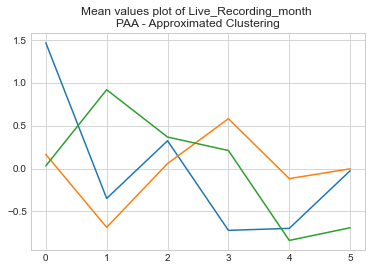

In [5186]:
plot_mean_values_approximated(labels_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  1.2636710924671304 Silhouette Score:  0.23801702022968163

k:  3 SSE:  0.7278460403429746 Silhouette Score:  0.22806276257406533

k:  4 SSE:  0.44046709546213625 Silhouette Score:  0.28438426179707965

k:  5 SSE:  0.21394166648060375 Silhouette Score:  0.24170415496115455

k:  6 SSE:  0.07232493748554794 Silhouette Score:  0.24072833157059864

k:  7 SSE:  0.03140491612296766 Silhouette Score:  0.13533834581258425



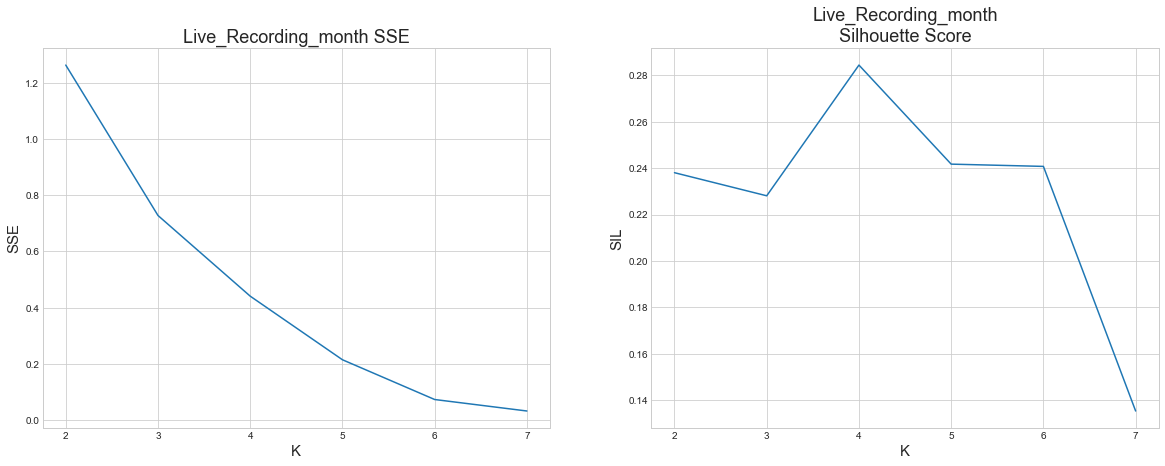

In [5187]:
find_optimal_k_kmeans(7, 'dtw', X_paa, False, album_type)

In [5188]:
cluster_centers_live_paa_dtw, dict_label_live_paa_dtw, labels_live_paa_dtw = run_kmeans(4, 300, 10, 'dtw', X_paa,\
                                                                      False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 2, 1: 3, 2: 2, 3: 1}

SSE:  0.44046709546213625
Silhouette Score:  0.28438426179707965


0         1         2         3         4  \
track_date_created                                                     
2009_live           0.315275  1.792930 -0.009554 -0.366229 -0.952195   
2010_live           1.000145 -0.948054  0.000000  0.948054 -0.114600   
2011_live          -0.996799 -0.735590  0.777624 -0.006005  0.462371   
2012_live           0.058976  0.420056  1.113328 -0.006018 -0.648739   
2013_live          -0.280384  0.546010  0.000000  1.003478 -0.914936   
2014_live           2.043907 -0.157224 -0.067382 -0.726223 -0.306960   
2015_live           0.493038 -0.373183 -0.601997  0.803570 -0.700059   
2016_live           0.892772 -0.539588  0.716180 -0.716180 -1.088986   

                           5  Labels  
track_date_created                    
2009_live          -0.780227       1  
2010_live          -0.885545       2  
2011_live           0.498400       3  
2012_live          -0.937603       1  
2013_live          -0.354169       1  
2014_live          -0.786118       2  
2015_live           0.378631       0  
2016_live           0.735801       0


Cluster 0
 ['2015_live', '2016_live']

Cluster 1
 ['2009_live', '2012_live', '2013_live']

Cluster 2
 ['2010_live', '2014_live']

Cluster 3
 ['2011_live']




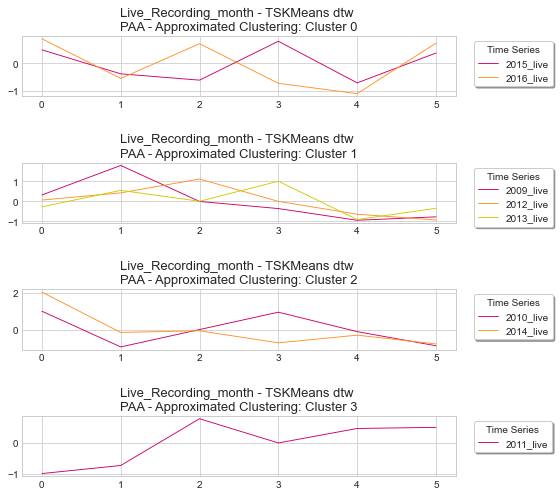

In [5189]:
analyze_approximated_clusters(labels_live_paa_dtw, X_paa, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', False)

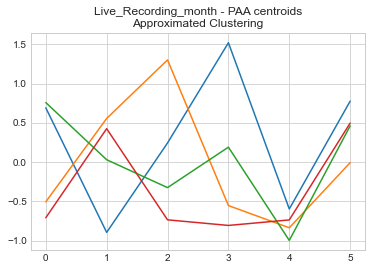

In [5190]:
plot_centroids_approximated(cluster_centers_live_paa_dtw, X_paa, album_type, 'PAA')

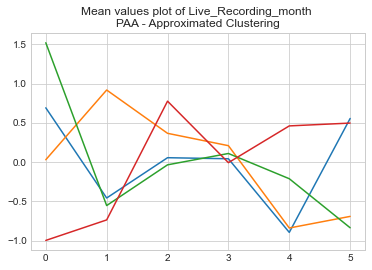

In [5191]:
plot_mean_values_approximated(labels_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5192]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_live_scaled)

In [5193]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  16.21666666666667 Silhouette Score:  0.14662692686427686

k:  3 SSE:  12.2375 Silhouette Score:  0.1126409580347573

k:  4 SSE:  8.9375 Silhouette Score:  0.07532661221656642

k:  5 SSE:  6.0 Silhouette Score:  0.06276284138392732

k:  6 SSE:  3.25 Silhouette Score:  0.06767072591383157

k:  7 SSE:  1.3125 Silhouette Score:  0.029065239701508608



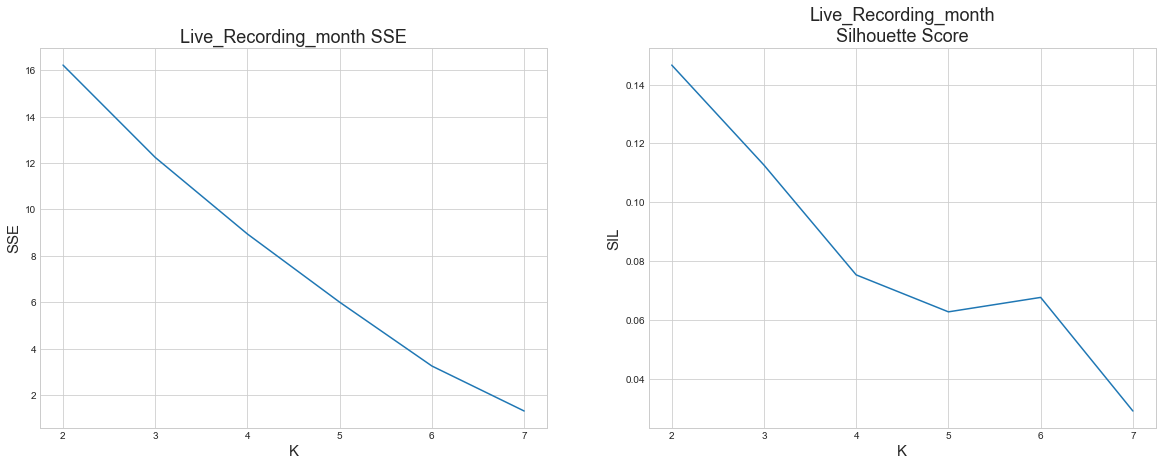

In [5194]:
find_optimal_k_kmeans(7, 'euclidean', X_sax1d, False, album_type)

In [5195]:
cluster_centers_live_sax1d, dict_label_live_sax1d, \
labels_live_sax1d = run_kmeans(3, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (3, 6, 2)

Labels:  {0: 5, 1: 2, 2: 1}

SSE:  12.2375
Silhouette Score:  0.1126409580347573


In [5196]:
#analyze_approximated_clusters(labels_live_sax1d, X_sax1d, df_tss_live_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', True)

In [5197]:
#plot_centroids_approximated(cluster_centers_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

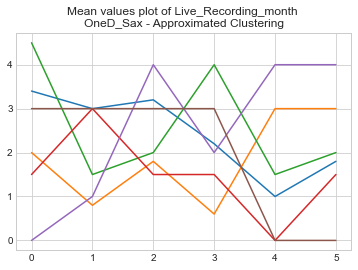

In [5198]:
plot_mean_values_approximated(labels_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  12.839285714285715 Silhouette Score:  0.21126001504224995

k:  3 SSE:  9.81547619047619 Silhouette Score:  0.0817986606778126

k:  4 SSE:  6.4541666666666675 Silhouette Score:  0.07554083843687706

k:  5 SSE:  3.604166666666667 Silhouette Score:  0.1004069401566196

k:  6 SSE:  2.458333333333334 Silhouette Score:  0.06661909061041382

k:  7 SSE:  0.9583333333333334 Silhouette Score:  0.0337617685412726



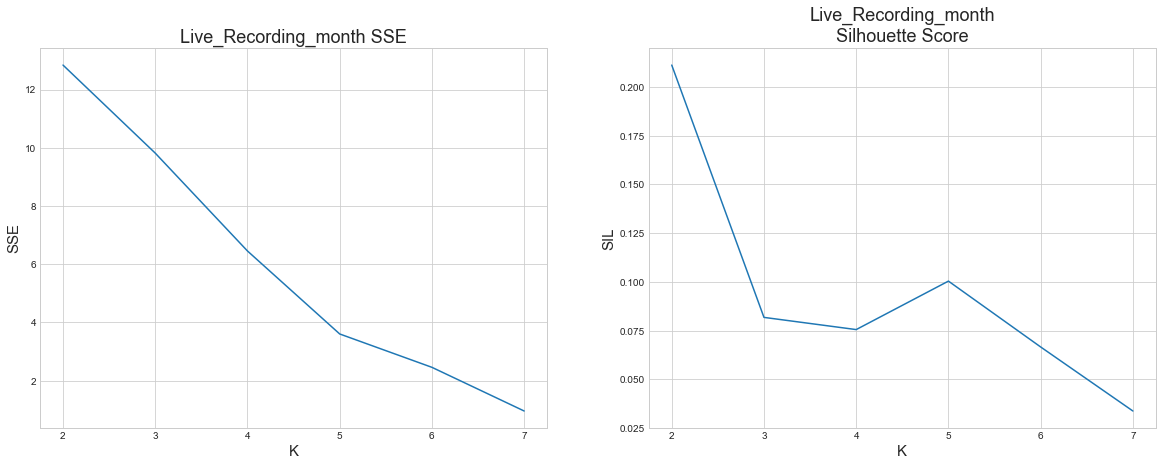

In [5199]:
find_optimal_k_kmeans(7, 'dtw', X_sax1d, False, album_type)

In [5200]:
cluster_centers_live_sax1d_dtw, dict_label_live_sax1d_dtw, \
labels_live_sax1d_dtw = run_kmeans(5, 300, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (5, 6, 2)

Labels:  {0: 2, 1: 2, 2: 1, 3: 1, 4: 2}

SSE:  3.604166666666667
Silhouette Score:  0.1004069401566196


In [5201]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [5202]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

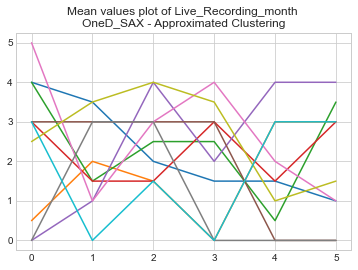

In [5203]:
plot_mean_values_approximated(labels_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5204]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_live_scaled)

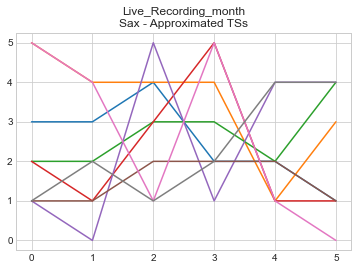

In [5205]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  7.392857142857143 Silhouette Score:  0.25854573237828393

k:  3 SSE:  4.9375 Silhouette Score:  0.13967568550815912

k:  4 SSE:  3.4583333333333335 Silhouette Score:  0.11622283287071336

k:  5 SSE:  2.375 Silhouette Score:  0.06479857780961479

k:  6 SSE:  1.5 Silhouette Score:  0.03200987695263275

k:  7 SSE:  0.6875 Silhouette Score:  0.017956395177790598



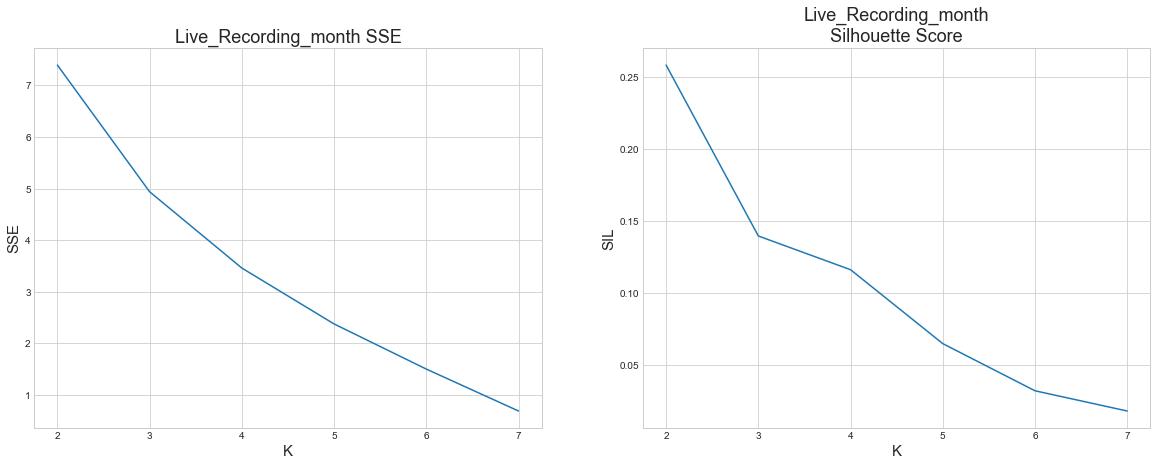

In [5206]:
find_optimal_k_kmeans(7, 'euclidean', X_sax, False, album_type)

In [5207]:
cluster_centers_live_sax, dict_label_live_sax, \
labels_live_sax = run_kmeans(3, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (3, 6, 1)

Labels:  {0: 3, 1: 4, 2: 1}

SSE:  4.9375
Silhouette Score:  0.13967568550815912


0  1  2  3  4  5  Labels
track_date_created                          
2009_live           3  5  2  2  1  1       0
2010_live           5  1  3  4  2  1       1
2011_live           0  1  4  2  4  4       2
2012_live           3  3  5  2  1  1       0
2013_live           2  4  3  5  1  2       0
2014_live           5  2  2  1  2  1       1
2015_live           4  2  1  4  1  3       1
2016_live           4  1  4  1  0  4       1


Cluster 0
 ['2009_live', '2012_live', '2013_live']

Cluster 1
 ['2010_live', '2014_live', '2015_live', '2016_live']

Cluster 2
 ['2011_live']




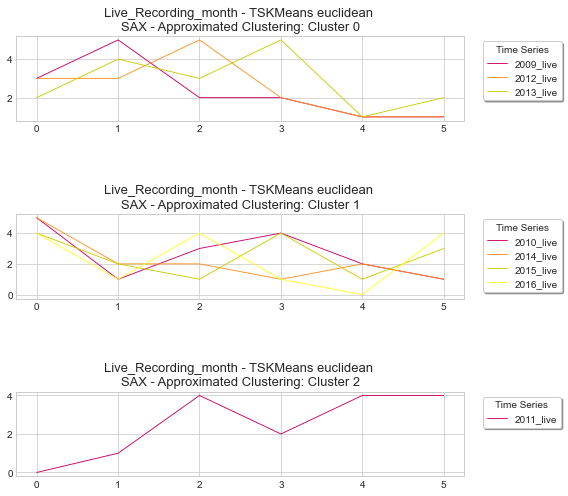

In [5208]:
analyze_approximated_clusters(labels_live_sax, X_sax, df_tss_live_scaled, \
                              album_type, \
                              'TSKMeans euclidean \nSAX - Approximated Clustering', False)

In [5209]:
plot_centroids_approximated(cluster_centers_live_sax, X_sax, album_type, 'Sax')

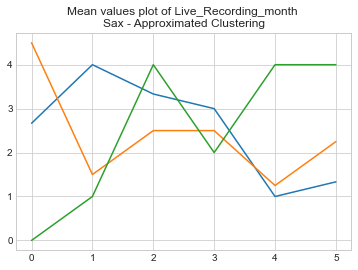

In [5210]:
plot_mean_values_approximated(labels_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

In [5211]:
find_optimal_k_kmeans(7, 'dtw', X_sax, False, album_type)

k:  2 SSE:  3.96875 Silhouette Score:  0.27878357006910354

k:  3 SSE:  2.333333333333333 Silhouette Score:  0.2368820841778455

k:  4 SSE:  1.0104166666666665 Silhouette Score:  0.3566701897663014

k:  5 SSE:  0.5833333333333334 Silhouette Score:  0.37440428718676344

k:  6 SSE:  0.20833333333333337 Silhouette Score:  0.36095344553802566

k:  7 SSE:  0.0 Silhouette Score:  0.25



In [5212]:
cluster_centers_live_sax_dtw, dict_label_live_sax_dtw, \
labels_live_sax_dtw = run_kmeans(5, 300, 10, 'dtw', X_sax, False)

cluster_centers_shape (5, 6, 1)

Labels:  {0: 1, 1: 2, 2: 2, 3: 2, 4: 1}

SSE:  0.5833333333333334
Silhouette Score:  0.37440428718676344


0  1  2  3  4  5  Labels
track_date_created                          
2009_live           3  5  2  2  1  1       3
2010_live           5  1  3  4  2  1       1
2011_live           0  1  4  2  4  4       4
2012_live           3  3  5  2  1  1       3
2013_live           2  4  3  5  1  2       0
2014_live           5  2  2  1  2  1       1
2015_live           4  2  1  4  1  3       2
2016_live           4  1  4  1  0  4       2


Cluster 0
 ['2013_live']

Cluster 1
 ['2010_live', '2014_live']

Cluster 2
 ['2015_live', '2016_live']

Cluster 3
 ['2009_live', '2012_live']

Cluster 4
 ['2011_live']




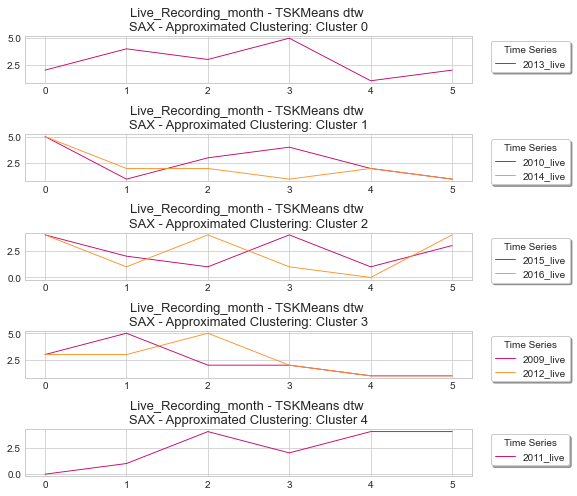

In [5213]:
analyze_approximated_clusters(labels_live_sax_dtw, X_sax, df_tss_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', False)

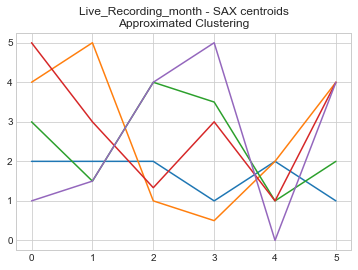

In [5214]:
plot_centroids_approximated(cluster_centers_live_sax_dtw, X_sax, album_type, 'SAX')

In [5215]:
plot_mean_values_approximated(labels_live_sax_dtw, X_sax, album_type, 'SAX')

**--------------------------------------------------------------------------------------------------------------------------------------------------------------------------**

<h1>Studio_Recording and Live_Recording</h1>

In [5216]:
album_type = "Studio_Recording_month - Live_Recording_month"

<h2>Shape based clustering</h2>

<h3>TimeSeriesKMeans</h3>

In [5217]:
df_studio_live

January  February  March  April   May  June  July  August  \
track_date_created                                                              
2009_studio             131       145    486   1501  1477   904  1005     353   
2010_studio             949       811    835    754  1180   761   786    1031   
2011_studio            1030       979    855    622   584   664  1145     988   
2012_studio            1103      1194    894    637  1172   992   652     595   
2013_studio            1397       753    954   1946  1122   958   651     695   
2014_studio             789       982    610    658  1150   614   604     815   
2015_studio             737      1051    998    975  1732   948   825     773   
2016_studio            1307      1376   1017    906  1494  1033   917     809   
2009_live               275       205    327    385   186   243   225     148   
2010_live               162       148     28     95    64   150   202     103   
2011_live                77       100     62    144   111   263   133     154   
2012_live                31       214    181    114   268   123   121     115   
2013_live                41        92    129     60    58    94   147      73   
2014_live               110       109     37     35    61    17    27       7   
2015_live                62        65     20     54    38    22    30     116   
2016_live                59        91     49     28    50    91    13      55   

                    September  October  November  December  
track_date_created                                          
2009_studio               321      555       731       657  
2010_studio               968     1001      1151      1263  
2011_studio               585      741       527       802  
2012_studio               650     1144       806       906  
2013_studio               842      939      1016      1303  
2014_studio               332      803       789      1025  
2015_studio               946      937      1069       932  
2016_studio              1493      941       987      1282  
2009_live                 111      170       120       188  
2010_live                 109       94        68        61  
2011_live                 218      121       192       151  
2012_live                  46      101        39        68  
2013_live                  39       51        39        89  
2014_live                  27       35        11        19  
2015_live                  53        1        31        89  
2016_live                  19       30        59        83

In [5218]:
df_studio_live.shape

(16, 12)

In [5219]:
tss_studio_live = to_time_series_dataset(df_studio_live.values)
tss_studio_live

array([[[1.310e+02],
        [1.450e+02],
        [4.860e+02],
        [1.501e+03],
        [1.477e+03],
        [9.040e+02],
        [1.005e+03],
        [3.530e+02],
        [3.210e+02],
        [5.550e+02],
        [7.310e+02],
        [6.570e+02]],

       [[9.490e+02],
        [8.110e+02],
        [8.350e+02],
        [7.540e+02],
        [1.180e+03],
        [7.610e+02],
        [7.860e+02],
        [1.031e+03],
        [9.680e+02],
        [1.001e+03],
        [1.151e+03],
        [1.263e+03]],

       [[1.030e+03],
        [9.790e+02],
        [8.550e+02],
        [6.220e+02],
        [5.840e+02],
        [6.640e+02],
        [1.145e+03],
        [9.880e+02],
        [5.850e+02],
        [7.410e+02],
        [5.270e+02],
        [8.020e+02]],

       [[1.103e+03],
        [1.194e+03],
        [8.940e+02],
        [6.370e+02],
        [1.172e+03],
        [9.920e+02],
        [6.520e+02],
        [5.950e+02],
        [6.500e+02],
        [1.144e+03],
        [8.060e+02],
       

In [5220]:
tss_studio_live.shape

(16, 12, 1)

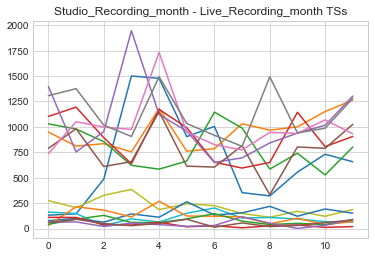

In [5221]:
plt.plot(np.squeeze(tss_studio_live).T)
plt.title(album_type + " TSs")
plt.show()

In [5222]:
tss_studio_live_scaled = TimeSeriesScalerMeanVariance().fit_transform(tss_studio_live)
tss_studio_live_scaled

array([[[-1.26218114e+00],
        [-1.23050405e+00],
        [-4.58940676e-01],
        [ 1.83764825e+00],
        [ 1.78334467e+00],
        [ 4.86846683e-01],
        [ 7.15374250e-01],
        [-7.59873018e-01],
        [-8.32277792e-01],
        [-3.02817883e-01],
        [ 9.54083739e-02],
        [-7.20276657e-02]],

       [[-5.09749520e-02],
        [-8.78568290e-01],
        [-7.34639014e-01],
        [-1.22040032e+00],
        [ 1.33434433e+00],
        [-1.17842095e+00],
        [-1.02849462e+00],
        [ 4.40783408e-01],
        [ 6.29690583e-02],
        [ 2.60871813e-01],
        [ 1.16042979e+00],
        [ 1.83209974e+00]],

       [[ 1.20413941e+00],
        [ 9.44472983e-01],
        [ 3.13127161e-01],
        [-8.73192003e-01],
        [-1.06666895e+00],
        [-6.59349064e-01],
        [ 1.78966174e+00],
        [ 9.90296470e-01],
        [-1.06157745e+00],
        [-2.67303674e-01],
        [-1.35688437e+00],
        [ 4.32777378e-02]],

       [[ 9.57100852e-

In [5223]:
tss_studio_live_scaled.shape

(16, 12, 1)

In [5224]:
plt.plot(np.squeeze(tss_studio_live_scaled).T)
plt.title(album_type + " scaled TSs")
plt.show()

**I convert scaled time series dataset to normal dataset**

In [5225]:
df_tss_studio_live_scaled = pd.DataFrame(np.squeeze(tss_studio_live_scaled), columns = df_studio_live.columns, \
                                    index = df_studio_live.index)
df_tss_studio_live_scaled

January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  
track_date_created                      
2009_studio         0.095408 -0.072028  
2010_studio         1.160430  1.832100  
2011_studio        -1.356884  0.043278  
2012_studio        -0.412272  0.048796  
2013_studio        -0.092369  0.736064  
2014_studio         0.116706  1.229542  
2015_studio         0.310298 -0.253381  
2016_studio        -0.612254  0.649317  
2009_live          -1.213333 -0.347121  
2010_live          -0.812618 -0.958472  
2011_live           0.867696  0.129104  
2012_live          -1.147029 -0.728177  
2013_live          -1.092020  0.383683  
2014_live          -0.905908 -0.666329  
2015_live          -0.569309  1.326572  
2016_live           0.264888  1.206714

<h3>Euclidean Distance</h3>

In [5226]:
find_optimal_k_kmeans(15, 'euclidean', tss_studio_live_scaled, False, album_type)

k:  2 SSE:  8.737010856914747 Silhouette Score:  0.11758042649937833

k:  3 SSE:  7.01827541089294 Silhouette Score:  0.1609453832008208

k:  4 SSE:  6.1058133262018615 Silhouette Score:  0.131704657465259

k:  5 SSE:  5.299209911983398 Silhouette Score:  0.12270245529668981

k:  6 SSE:  3.946564314348107 Silhouette Score:  0.17795878171625104

k:  7 SSE:  3.4698693670277443 Silhouette Score:  0.13930150294372373

k:  8 SSE:  2.8454892826034004 Silhouette Score:  0.14600697265885554

k:  9 SSE:  2.3295109889873284 Silhouette Score:  0.13706677425919186

k:  10 SSE:  1.8616555684201506 Silhouette Score:  0.10424773074293933

k:  11 SSE:  1.4199179304774086 Silhouette Score:  0.10767560008545157

k:  12 SSE:  1.0880312229216145 Silhouette Score:  0.08253896139125642

k:  13 SSE:  0.7654108515498643 Silhouette Score:  0.06544802494054669

k:  14 SSE:  0.48312388455745625 Silhouette Score:  0.03955485755976551

k:  15 SSE:  0.22858787644852527 Silhouette Score:  0.026064917063819915



**We can see that best k is 6**

In [5227]:
cluster_centers_studio_live_eu, dict_label_studio_live_eu, labels_studio_live_eu = run_kmeans(6, 1000, 10, \
                                                            'euclidean', tss_studio_live_scaled, False)

cluster_centers_shape (6, 12, 1)

Labels:  {0: 4, 1: 3, 2: 3, 3: 1, 4: 2, 5: 3}

SSE:  3.946564314348107
Silhouette Score:  0.17795878171625104


In [5228]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_eu)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       2  
2010_studio         1.160430  1.832100       0  
2011_studio        -1.356884  0.043278       1  
2012_studio        -0.412272  0.048796       5  
2013_studio        -0.092369  0.736064       4  
2014_studio         0.116706  1.229542       0  
2015_studio         0.310298 -0.253381       2  
2016_studio        -0.612254  0.649317       5  
2009_live          -1.213333 -0.347121       4  
2010_live          -0.812618 -0.958472       1  
2011_live           0.867696  0.129104       3  
2012_live          -1.147029 -0.728177       2  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       5  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2010_studio', '2014_studio', '2015_live', '2016_live']

Cluster 1
 ['2011_studio', '2010_live', '2013_live']

Cluster 2
 ['2009_studio', '2015_studio', '2012_live']

Cluster 3
 ['2011_live']

Cluster 4
 ['2013_studio', '2009_live']

Cluster 5
 ['2012_studio', '2016_studio', '2014_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              2            4   1.0000  0.5000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                2              1            3   0.9183  0.6667
Cluster 3                0              1            1  -0.0000  1.0000
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                2              1            3   0.9183  0.6667
Total                    8              8           16   0.8915  0.6250

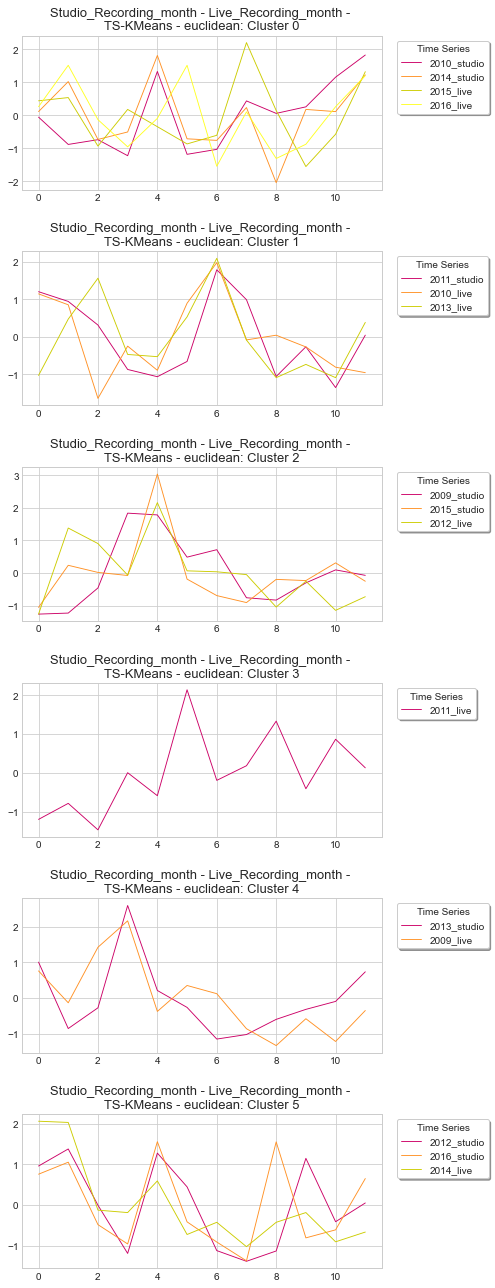

In [5229]:
analyze_clusters(labels_studio_live_eu, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 '\nTS-KMeans - euclidean', True)

**Centroids**

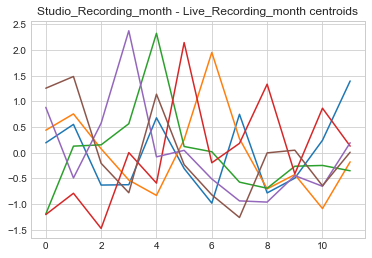

In [5230]:
plot_kmeans_centroids(cluster_centers_studio_live_eu, album_type)

<h3>DTW distance</h3>

k:  2 SSE:  3.3406897361214654 Silhouette Score:  0.2384724575950979

k:  3 SSE:  2.6554844778967808 Silhouette Score:  0.197185879392947

k:  4 SSE:  2.180259594378552 Silhouette Score:  0.1606852995498542

k:  5 SSE:  1.813016268705198 Silhouette Score:  0.15542500324635328

k:  6 SSE:  1.48309968055562 Silhouette Score:  0.15857317118720954

k:  7 SSE:  1.1877059968566255 Silhouette Score:  0.18867865155489844

k:  8 SSE:  0.9994403044442187 Silhouette Score:  0.16259938017894016

k:  9 SSE:  0.7806986369566888 Silhouette Score:  0.15708279774764944

k:  10 SSE:  0.5977019242217864 Silhouette Score:  0.13413159881550876

k:  11 SSE:  0.48023734564458415 Silhouette Score:  0.12233845059213536

k:  12 SSE:  0.34067476436147814 Silhouette Score:  0.10935595171164392

k:  13 SSE:  0.22723440994206012 Silhouette Score:  0.09569553706437504

k:  14 SSE:  0.14524252201987747 Silhouette Score:  0.06373790078690789

k:  15 SSE:  0.0635539084699341 Silhouette Score:  0.03833243775626887



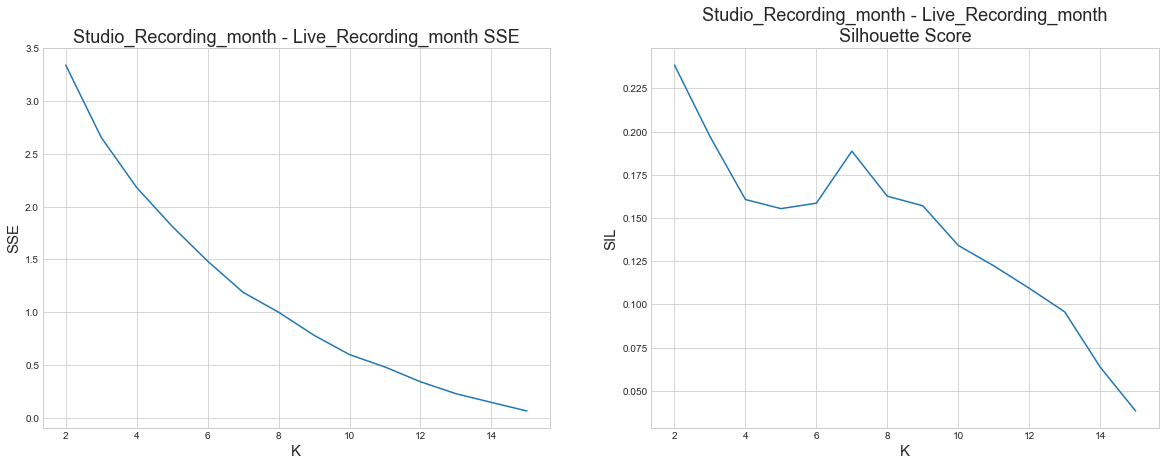

In [5231]:
find_optimal_k_kmeans(15, 'dtw', tss_studio_live_scaled, False, album_type)

**We can see that best k is 3**

In [5232]:
cluster_centers_studio_live_dtw, dict_label_studio_live_dtw, \
labels_studio_live_dtw = run_kmeans(3, 1000, 10, 'dtw', tss_studio_live_scaled, False)

cluster_centers_shape (3, 12, 1)

Labels:  {0: 5, 1: 6, 2: 5}

SSE:  2.6554844778967808
Silhouette Score:  0.197185879392947


In [5233]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_dtw)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       2  
2010_studio         1.160430  1.832100       1  
2011_studio        -1.356884  0.043278       0  
2012_studio        -0.412272  0.048796       0  
2013_studio        -0.092369  0.736064       1  
2014_studio         0.116706  1.229542       1  
2015_studio         0.310298 -0.253381       2  
2016_studio        -0.612254  0.649317       1  
2009_live          -1.213333 -0.347121       0  
2010_live          -0.812618 -0.958472       0  
2011_live           0.867696  0.129104       2  
2012_live          -1.147029 -0.728177       2  
2013_live          -1.092020  0.383683       2  
2014_live          -0.905908 -0.666329       0  
2015_live          -0.569309  1.326572       1  
2016_live           0.264888  1.206714       1

Cluster 0
 ['2011_studio', '2012_studio', '2009_live', '2010_live', '2014_live']

Cluster 1
 ['2010_studio', '2013_studio', '2014_studio', '2016_studio', '2015_live', '2016_live']

Cluster 2
 ['2009_studio', '2015_studio', '2011_live', '2012_live', '2013_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                2              3            5  0.9710  0.6000
Cluster 1                4              2            6  0.9183  0.6667
Cluster 2                2              3            5  0.9710  0.6000
Total                    8              8           16  0.9512  0.6250

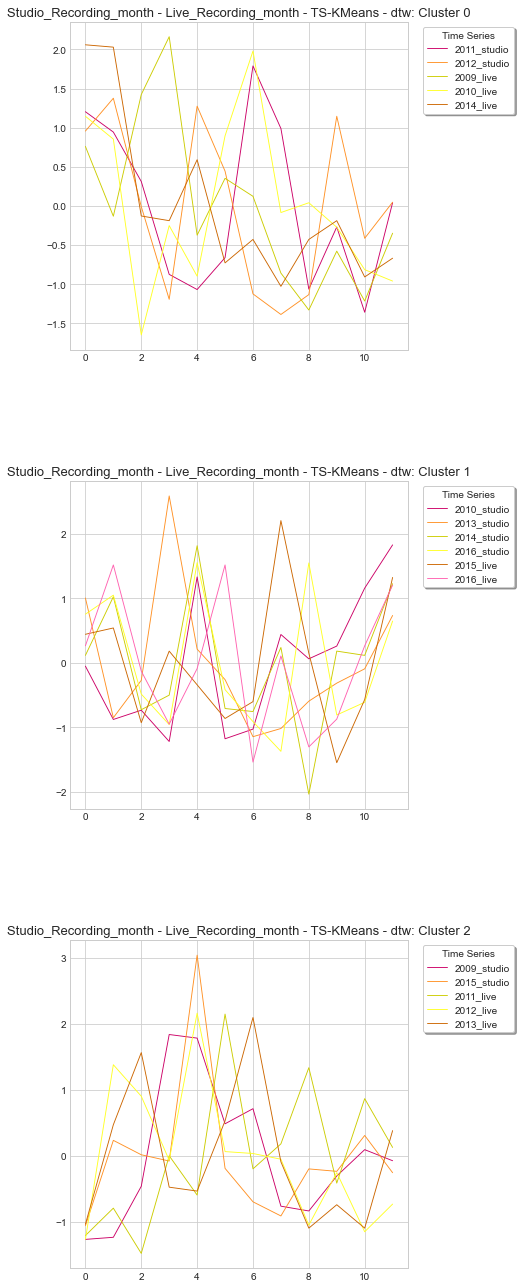

In [5234]:
analyze_clusters(labels_studio_live_dtw, tss_studio_live_scaled, df_tss_studio_live_scaled, album_type, \
                 'TS-KMeans - dtw', True)

**Centroids**

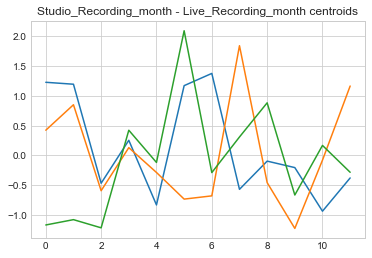

In [5235]:
plot_kmeans_centroids(cluster_centers_studio_live_dtw, album_type)

<h3>KMeans sklearn</h3>

k:  2 SSE:  139.79217371063598 Silhouette Score:  0.11758042649937835
Calinski-Harabaz:  3.1859841557329305 Davies-Bouldin:  1.9927032277836307

k:  3 SSE:  112.29240657428703 Silhouette Score:  0.16094538320082075
Calinski-Harabaz:  3.4332689999524804 Davies-Bouldin:  1.5455474189181875

k:  4 SSE:  97.69301321922975 Silhouette Score:  0.13170465746525906
Calinski-Harabaz:  3.0262842560710563 Davies-Bouldin:  1.4737882461232505

k:  5 SSE:  84.78735859173437 Silhouette Score:  0.12270245529668977
Calinski-Harabaz:  2.8158412801931063 Davies-Bouldin:  1.3038220262677627

k:  6 SSE:  63.14502902956971 Silhouette Score:  0.177958781716251
Calinski-Harabaz:  3.435256672294646 Davies-Bouldin:  1.078107177575092

k:  7 SSE:  55.51790987244391 Silhouette Score:  0.13930150294372373
Calinski-Harabaz:  3.1364692197133466 Davies-Bouldin:  0.9731747887810976

k:  8 SSE:  45.52782852165441 Silhouette Score:  0.14600697265885548
Calinski-Harabaz:  3.164830848668644 Davies-Bouldin:  0.7984643624322

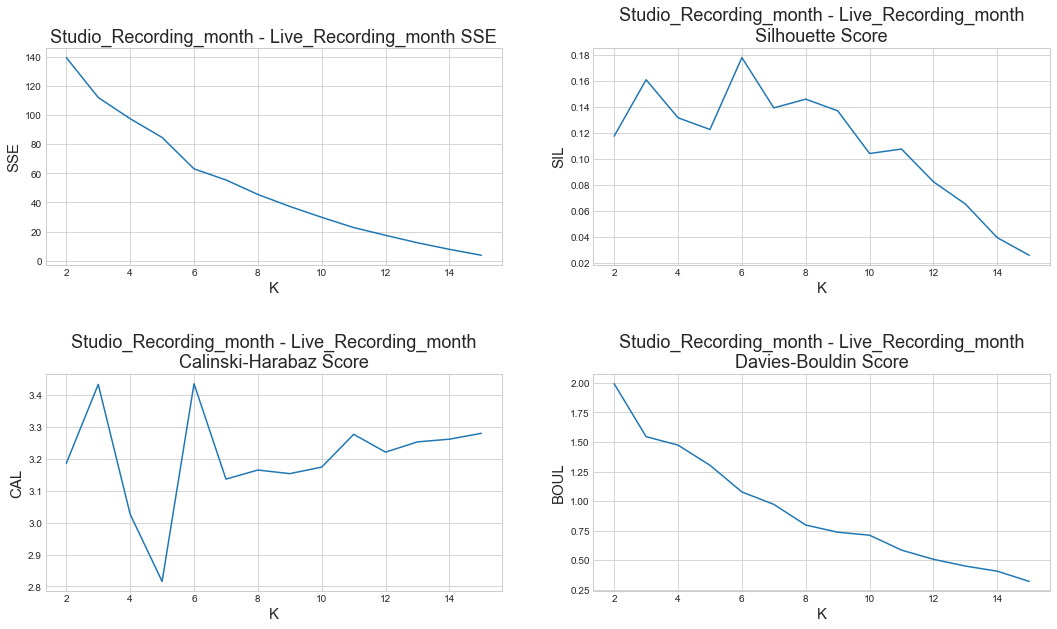

In [5236]:
find_optimal_k_kmeans(15, "", df_tss_studio_live_scaled, True, album_type)

In [5237]:
cluster_centers_studio_live_2, dict_label_studio_live_2, labels_studio_live_2 = run_kmeans(6, 1000, 10, '', \
                                                                        df_tss_studio_live_scaled, True)

cluster_centers_shape (6, 12)

Labels:  {0: 4, 1: 3, 2: 3, 3: 1, 4: 2, 5: 3}

SSE:  63.14502902956971
Silhouette Score:  0.177958781716251
Calinski - Harabaz Score:  3.435256672294646
Davies - Bouldin Score:  1.078107177575092


In [5238]:
cluster_insight_studio_live(df_tss_studio_live_scaled, labels_studio_live_2)

Dataset con le labels associate


January  February     March     April       May  \
track_date_created                                                     
2009_studio        -1.262181 -1.230504 -0.458941  1.837648  1.783345   
2010_studio        -0.050975 -0.878568 -0.734639 -1.220400  1.334344   
2011_studio         1.204139  0.944473  0.313127 -0.873192 -1.066669   
2012_studio         0.957101  1.376673 -0.006532 -1.191477  1.275238   
2013_studio         1.007397 -0.851525 -0.271333  2.592099  0.213603   
2014_studio         0.116706  1.026780 -0.727351 -0.501012  1.818968   
2015_studio        -1.055698  0.236238  0.018172 -0.076460  3.038175   
2016_studio         0.756230  1.051310 -0.483959 -0.958652  1.555938   
2009_live           0.761119 -0.130569  1.423516  2.162344 -0.372598   
2010_live           1.145999  0.854290 -1.646071 -0.250036 -0.895963   
2011_live          -1.203965 -0.789633 -1.474182  0.003002 -0.591474   
2012_live          -1.262574  1.380527  0.903902 -0.063791  2.160458   
2013_live          -1.032992  0.472225  1.564246 -0.472225 -0.531253   
2014_live           2.058881  2.028933 -0.127276 -0.187171  0.591460   
2015_live           0.444007  0.542069 -0.928873  0.182506 -0.340496   
2016_live           0.264888  1.520656 -0.127539 -0.951636 -0.088296   

                        June      July    August  September   October  \
track_date_created                                                      
2009_studio         0.486847  0.715374 -0.759873  -0.832278 -0.302818   
2010_studio        -1.178421 -1.028495  0.440783   0.062969  0.260872   
2011_studio        -0.659349  1.789662  0.990296  -1.061577 -0.267304   
2012_studio         0.445315 -1.122317 -1.385126  -1.131538  1.146139   
2013_studio        -0.259787 -1.145950 -1.018943  -0.594624 -0.314631   
2014_studio        -0.708490 -0.755644  0.239307  -2.038234  0.182722   
2015_studio        -0.187550 -0.693627 -0.907578  -0.195779 -0.232809   
2016_studio        -0.415535 -0.911610 -1.373474   1.551662 -0.808974   
2009_live           0.353491  0.124199 -0.856657  -1.327978 -0.576413   
2010_live           0.895963  1.979453 -0.083345   0.041673 -0.270873   
2011_live           2.146721 -0.195156  0.183147   1.336071 -0.411330   
2012_live           0.066198  0.037312 -0.049348  -1.045926 -0.251552   
2013_live           0.531253  2.095499 -0.088542  -1.092020 -0.737852   
2014_live          -0.726223 -0.426750 -1.025697  -0.426750 -0.187171   
2015_live          -0.863497 -0.601997  2.209137   0.149818 -1.549937   
2016_live           1.520656 -1.540277  0.107918  -1.304821 -0.873151   

                    November  December  Labels  
track_date_created                              
2009_studio         0.095408 -0.072028       2  
2010_studio         1.160430  1.832100       0  
2011_studio        -1.356884  0.043278       1  
2012_studio        -0.412272  0.048796       5  
2013_studio        -0.092369  0.736064       4  
2014_studio         0.116706  1.229542       0  
2015_studio         0.310298 -0.253381       2  
2016_studio        -0.612254  0.649317       5  
2009_live          -1.213333 -0.347121       4  
2010_live          -0.812618 -0.958472       1  
2011_live           0.867696  0.129104       3  
2012_live          -1.147029 -0.728177       2  
2013_live          -1.092020  0.383683       1  
2014_live          -0.905908 -0.666329       5  
2015_live          -0.569309  1.326572       0  
2016_live           0.264888  1.206714       0

Cluster 0
 ['2010_studio', '2014_studio', '2015_live', '2016_live']

Cluster 1
 ['2011_studio', '2010_live', '2013_live']

Cluster 2
 ['2009_studio', '2015_studio', '2012_live']

Cluster 3
 ['2011_live']

Cluster 4
 ['2013_studio', '2009_live']

Cluster 5
 ['2012_studio', '2016_studio', '2014_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                2              2            4   1.0000  0.5000
Cluster 1                1              2            3   0.9183  0.6667
Cluster 2                2              1            3   0.9183  0.6667
Cluster 3                0              1            1  -0.0000  1.0000
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                2              1            3   0.9183  0.6667
Total                    8              8           16   0.8915  0.6250

<h2>Feature based Clustering</h2>

<h3>KMeans</h3>

In [5239]:
F = [list(calculate_features(x).values())for x in tss_studio_live_scaled]

k:  2 SSE:  8.773759588744339 Silhouette Score:  0.754863401388787
Calinski-Harabaz:  39.05160488126425 Davies-Bouldin:  0.1225628233003499

k:  3 SSE:  3.974043323218126 Silhouette Score:  0.4124114698100193
Calinski-Harabaz:  47.87972163708126 Davies-Bouldin:  0.5489076653760021

k: 

<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

 4 SSE:  1.6140154024341564 Silhouette Score:  0.4832162817914924
Calinski-Harabaz:  78.39645692233306 Davies-Bouldin:  0.4873207327992506

k:  5 SSE:  1.0623480150206326 Silhouette Score:  0.4172648385798301
Calinski-Harabaz:  83.31411432984586 Davies-Bouldin:  0.3234666685215391

k:  6 SSE:  0.6335631225335849 Silhouette Score:  0.42812881947320114
Calinski-Harabaz:  102.95335496077453 Davies-Bouldin:  0.271999589513934

k:  7 SSE:  0.36158106059767997 Silhouette Score:  0.382650280662766
Calinski-Harabaz:  136.4246230003259 Davies-Bouldin:  0.3060714174500978

k:  8 SSE:  0.2238157147344755 Silhouette Score:  0.3313990765214954
Calinski-Harabaz:  168.62583050450377 Davies-Bouldin:  0.3054258562016954

k:  9 SSE:  0.17183663614043576 Silhouette Score:  0.2288325317785881
Calinski-Harabaz:  168.42170728251418 Davies-Bouldin:  0.29953654959239817



<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

k:  10 SSE:  0.10802974165416798 Silhouette Score:  0.21111073995546664
Calinski-Harabaz:  204.50700208772406 Davies-Bouldin:  0.4020977061795449

k:  11 SSE:  0.07318978688576935 Silhouette Score:  0.19697226903016118
Calinski-Harabaz:  226.6306493660964 Davies-Bouldin:  0.2810467602172082

k:  12 SSE:  0.045655447810011435 Silhouette Score:  0.14287131167417802
Calinski-Harabaz:  264.4442531611267 Davies-Bouldin:  0.211750981509901

k:  13 SSE:  0.020054488440744794 Silhouette Score:  0.12957621986013915
Calinski-Harabaz:  414.2119263525233 Davies-Bouldin:  0.18421733847223526



/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead.
  return f(*args, **kwargs)
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to d

k:  14 SSE:  0.007730206418420796 Silhouette Score:  0.10027227991946062
Calinski-Harabaz:  661.5318906926141 Davies-Bouldin:  0.09937971465942608

k:  15 SSE:  0.0006827460670547921 Silhouette Score:  0.08075159013390427
Calinski-Harabaz:  3478.2441193706677 Davies-Bouldin:  0.052390042399078886



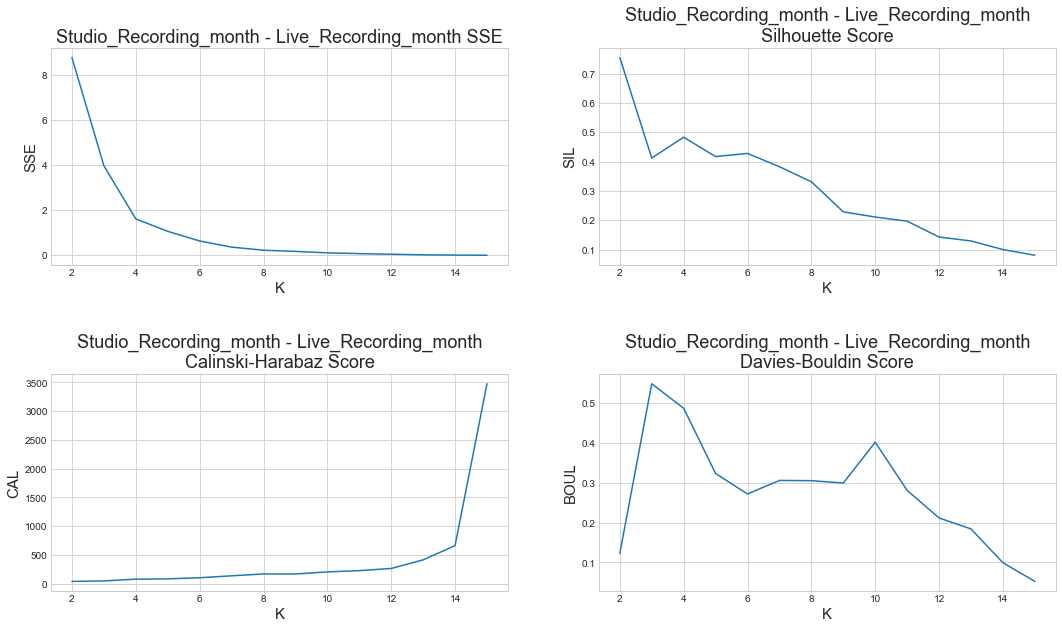

In [5240]:
find_optimal_k_kmeans(15, "", F, True, album_type)

In [5241]:
cluster_centers_studio_live_fb, dict_label_studio_live_fb, labels_studio_live_fb = run_kmeans(4, 1000, 10, "", F, \
                                                                                              True)

cluster_centers_shape (4, 5)

Labels:  {0: 5, 1: 1, 2: 2, 3: 8}

SSE:  1.6140154024341564
Silhouette Score:  0.4832162817914924
Calinski - Harabaz Score:  78.39645692233306
Davies - Bouldin Score:  0.4873207327992506


<__array_function__ internals>:5: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
/opt/anaconda3/lib/python3.8/site-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:63: FutureWarning: Arrays of bytes/strings is being converted to decimal numbers if dtype='numeric'. This behavior is deprecated in 0.24 and will be removed in 1.1 (renaming of 0.26). Please convert your data to numeric values explicitly instead

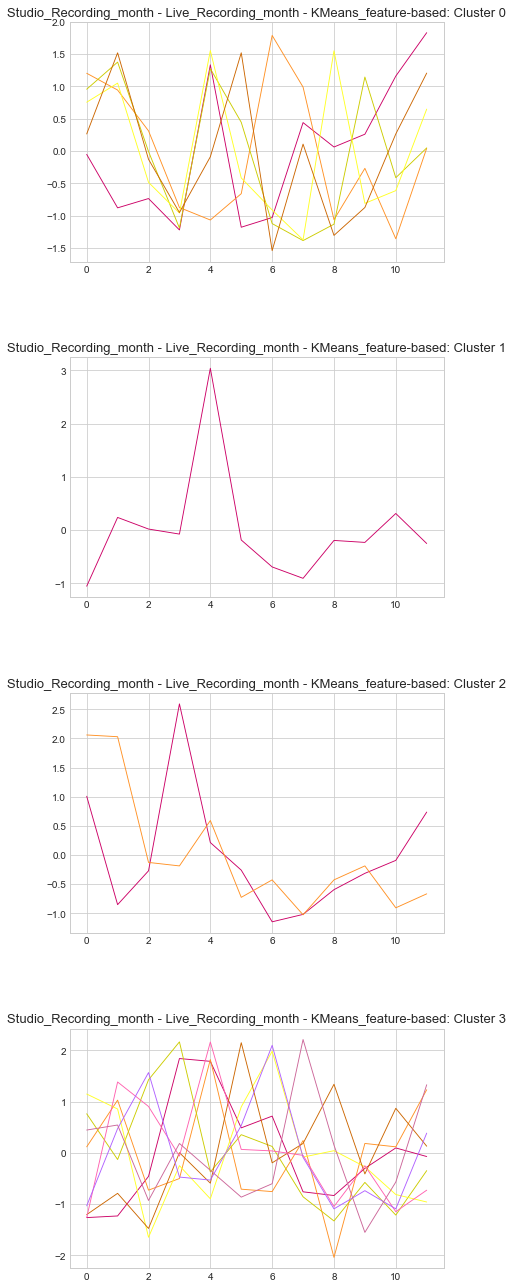

In [5242]:
analyze_clusters_fb(labels_studio_live_fb, tss_studio_live_scaled, album_type, 'KMeans_feature-based', True)

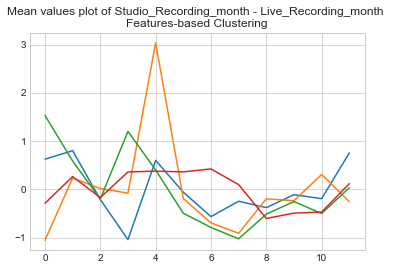

In [5243]:
plot_mean_values(labels_studio_live_fb, tss_studio_live_scaled, album_type)

<h2>Compression-based Clustering</h2>

<h3>DBSCAN</h3>

In [5244]:
M = pairwise_distances(tss_studio_live_scaled.reshape(tss_studio_live_scaled.shape[0], \
                                        tss_studio_live_scaled.shape[1]), metric=cdm_dist)

In [5245]:
print(tss_studio_live_scaled.shape, M.shape)

(16, 12, 1) (16, 16)


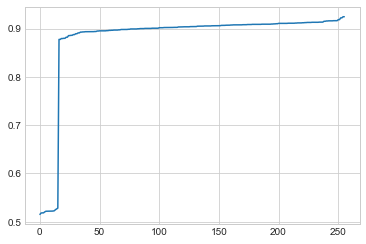

In [5246]:
plt.plot(sorted(M.ravel()))
plt.show()

In [5247]:
dbscan_compression_studio_live = DBSCAN(eps=0.88, min_samples=5, metric='precomputed')
dbscan_compression_studio_live.fit(M)

DBSCAN(eps=0.88, metric='precomputed')

In [5248]:
dbscan_compression_studio_live.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1])

<h2>Approximation-based Clustering</h2>

<h3>PiecewiseAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5249]:
n_paa_segments = 6
paa = PiecewiseAggregateApproximation(n_segments=n_paa_segments)
X_paa = paa.fit_transform(tss_studio_live_scaled)

In [5250]:
X_paa.shape

(16, 6, 1)

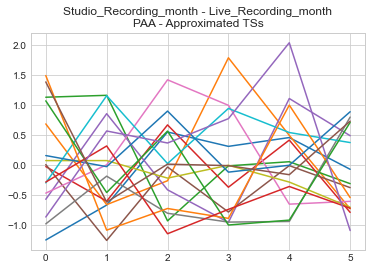

In [5251]:
plt.plot(X_paa.reshape(X_paa.shape[1], X_paa.shape[0]))
plt.title(album_type + "\nPAA - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  2.2333165851760066 Silhouette Score:  0.19900036568884133

k:  3 SSE:  1.6470679050533414 Silhouette Score:  0.22725270750012178

k:  4 SSE:  1.1783742275031326 Silhouette Score:  0.2755621802047293

k:  5 SSE:  0.9362233672196327 Silhouette Score:  0.28790069370637705

k:  6 SSE:  0.7214973449986051 Silhouette Score:  0.3091420884643965

k:  7 SSE:  0.5559562664123172 Silhouette Score:  0.3044760603216742

k:  8 SSE:  0.4372895453265816 Silhouette Score:  0.3237496839561858

k:  9 SSE:  0.35991812123512645 Silhouette Score:  0.2642570492188578

k:  10 SSE:  0.27918514406577577 Silhouette Score:  0.23611022378337193

k:  11 SSE:  0.20329048284749945 Silhouette Score:  0.21542533081378176

k:  12 SSE:  0.1398127258978435 Silhouette Score:  0.19958246656092227

k:  13 SSE:  0.07731355638731309 Silhouette Score:  0.17388395854508581

k:  14 SSE:  0.022735980456584776 Silhouette Score:  0.15831257495199613

k:  15 SSE:  0.011041497402187978 Silhouette Score:  0.0792990941532049

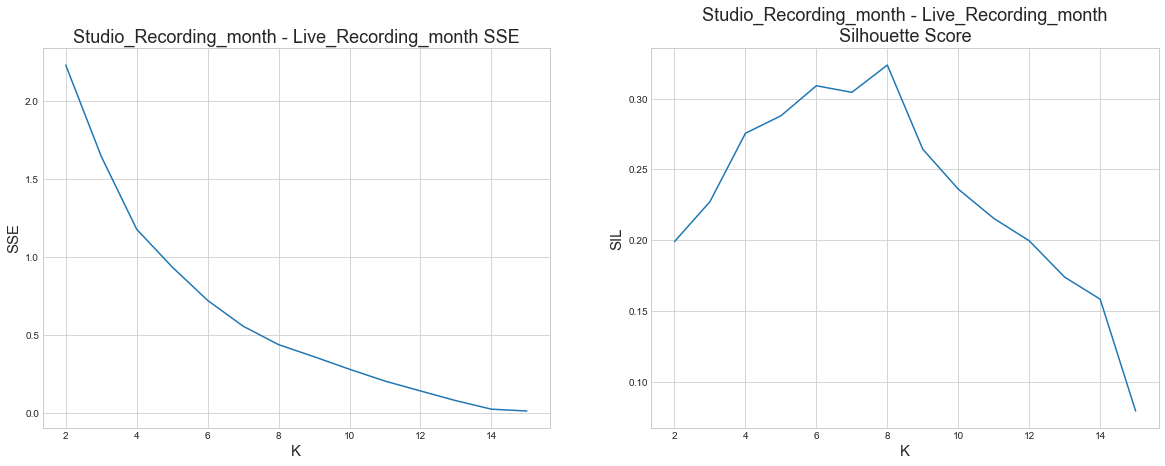

In [5252]:
find_optimal_k_kmeans(15, 'euclidean', X_paa, False, album_type)

In [5253]:
cluster_centers_studio_live_paa, dict_label_studio_live_paa, labels_studio_live_paa = run_kmeans(8, 1000, 10, \
                                                                'euclidean', X_paa, False)

cluster_centers_shape (8, 6, 1)

Labels:  {0: 2, 1: 1, 2: 2, 3: 3, 4: 2, 5: 2, 6: 2, 7: 2}

SSE:  0.4372895453265816
Silhouette Score:  0.3237496839561858


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.246343  0.689354  1.135096 -0.022249 -0.567548   
2010_studio        -0.464772 -0.977520  0.077962 -0.293856  0.161920   
2011_studio         1.074306 -0.280032 -0.863009  1.389979 -0.664441   
2012_studio         1.166887 -0.599005  0.860277 -1.253721  0.007300   
2013_studio         0.077936  1.160383 -0.023092 -1.082447 -0.454628   
2014_studio         0.571743 -0.614182  0.555239 -0.258169 -0.927756   
2015_studio        -0.409730 -0.029144  1.425313 -0.800603 -0.214294   
2016_studio         0.903770 -0.721305  0.570202 -1.142542  0.371344   
2009_live           0.315275  1.792930 -0.009554 -0.366229 -0.952195   
2010_live           1.000145 -0.948054  0.000000  0.948054 -0.114600   
2011_live          -0.996799 -0.735590  0.777624 -0.006005  0.462371   
2012_live           0.058976  0.420056  1.113328 -0.006018 -0.648739   
2013_live          -0.280384  0.546010  0.000000  1.003478 -0.914936   
2014_live           2.043907 -0.157224 -0.067382 -0.726223 -0.306960   
2015_live           0.493038 -0.373183 -0.601997  0.803570 -0.700059   
2016_live           0.892772 -0.539588  0.716180 -0.716180 -1.088986   

                           5  Labels  
track_date_created                    
2009_studio         0.011690       3  
2010_studio         1.496265       7  
2011_studio        -0.656803       4  
2012_studio        -0.181738       6  
2013_studio         0.321848       5  
2014_studio         0.673124       2  
2015_studio         0.028458       3  
2016_studio         0.018532       6  
2009_live          -0.780227       5  
2010_live          -0.885545       4  
2011_live           0.498400       7  
2012_live          -0.937603       3  
2013_live          -0.354169       0  
2014_live          -0.786118       1  
2015_live           0.378631       0  
2016_live           0.735801       2

Cluster 0
 ['2013_live', '2015_live']

Cluster 1
 ['2014_live']

Cluster 2
 ['2014_studio', '2016_live']

Cluster 3
 ['2009_studio', '2015_studio', '2012_live']

Cluster 4
 ['2011_studio', '2010_live']

Cluster 5
 ['2013_studio', '2009_live']

Cluster 6
 ['2012_studio', '2016_studio']

Cluster 7
 ['2010_studio', '2011_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                0              2            2  -0.0000  1.0000
Cluster 1                0              1            1  -0.0000  1.0000
Cluster 2                1              1            2   1.0000  0.5000
Cluster 3                2              1            3   0.9183  0.6667
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                1              1            2   1.0000  0.5000
Cluster 6                2              0            2  -0.0000  1.0000
Cluster 7                1              1            2   1.0000  0.5000
Total                    8              8           16   0.6722  0.6875

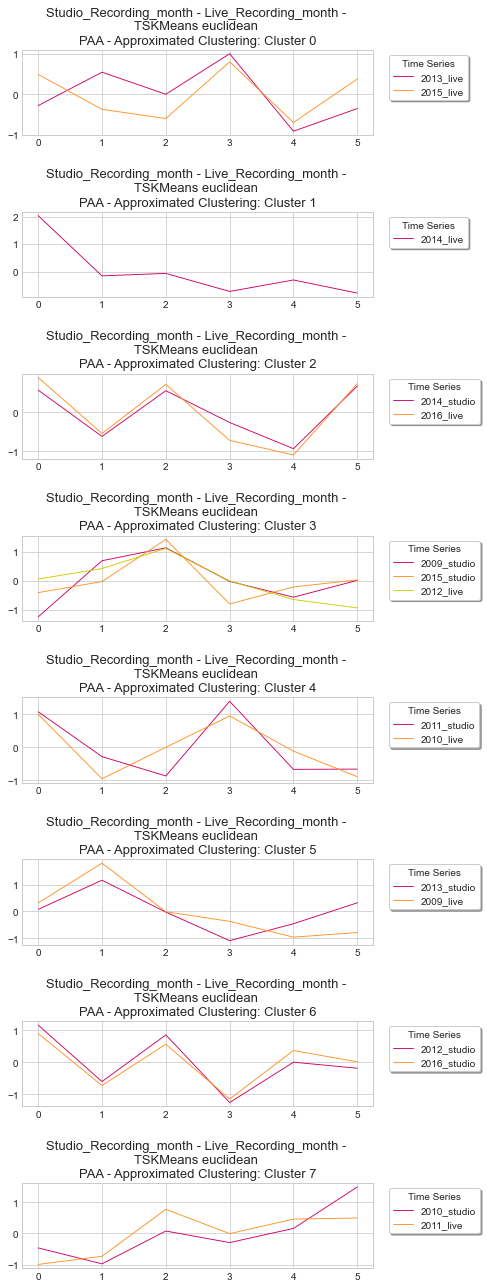

In [5254]:
analyze_approximated_clusters(labels_studio_live_paa, X_paa, df_tss_studio_live_scaled, album_type, \
                               '\nTSKMeans euclidean \nPAA - Approximated Clustering', True)

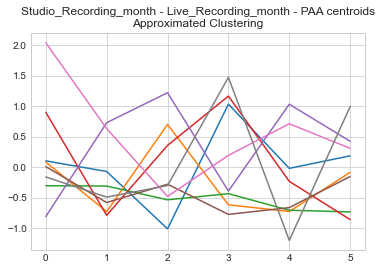

In [5255]:
plot_centroids_approximated(cluster_centers_studio_live_paa, X_paa, album_type, 'PAA')

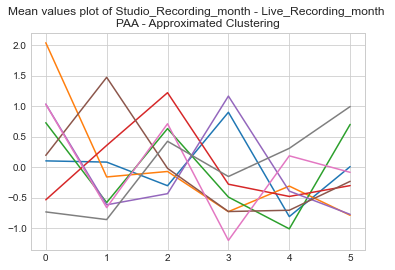

In [5256]:
plot_mean_values_approximated(labels_studio_live_paa, X_paa, album_type, 'PAA')

<h3>DTW</h3>

k:  2 SSE:  1.2194471779667262 Silhouette Score:  0.23864778844751572

k:  3 SSE:  0.9258213310313603 Silhouette Score:  0.26161570126221423

k:  4 SSE:  0.6701727497015421 Silhouette Score:  0.24619276332768358

k:  5 SSE:  0.5601787039030566 Silhouette Score:  0.24789127027733387

k:  6 SSE:  0.4217307029760413 Silhouette Score:  0.2385832148268769

k:  7 SSE:  0.32669395727740314 Silhouette Score:  0.26417532743805205

k:  8 SSE:  0.23184820412356755 Silhouette Score:  0.28427442923318025

k:  9 SSE:  0.16828870771202786 Silhouette Score:  0.26731805416923404

k:  10 SSE:  0.1242846738790117 Silhouette Score:  0.24938811704953517

k:  11 SSE:  0.08226475734677405 Silhouette Score:  0.21939205354279653

k:  12 SSE:  0.059161505430541966 Silhouette Score:  0.1802477891120574

k:  13 SSE:  0.03870149474925183 Silhouette Score:  0.13167797283455512

k:  14 SSE:  0.022735980456584776 Silhouette Score:  0.060403156358364754

k:  15 SSE:  0.011041497402187978 Silhouette Score:  0.047074638

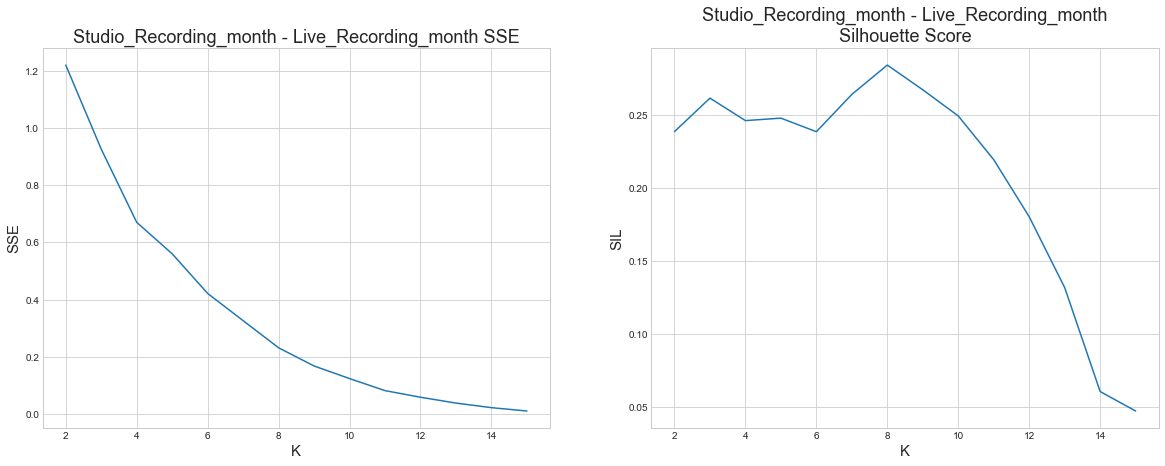

In [5257]:
find_optimal_k_kmeans(15, 'dtw', X_paa, False, album_type)

In [5258]:
cluster_centers_studio_live_paa_dtw, dict_label_studio_live_paa_dtw, \
labels_studio_live_paa_dtw = run_kmeans(8, 1000, 10, 'dtw', X_paa, False)

cluster_centers_shape (8, 6, 1)

Labels:  {0: 1, 1: 2, 2: 2, 3: 1, 4: 2, 5: 3, 6: 2, 7: 3}

SSE:  0.23184820412356755
Silhouette Score:  0.28427442923318025


Dataset con le labels associate


0         1         2         3         4  \
track_date_created                                                     
2009_studio        -1.246343  0.689354  1.135096 -0.022249 -0.567548   
2010_studio        -0.464772 -0.977520  0.077962 -0.293856  0.161920   
2011_studio         1.074306 -0.280032 -0.863009  1.389979 -0.664441   
2012_studio         1.166887 -0.599005  0.860277 -1.253721  0.007300   
2013_studio         0.077936  1.160383 -0.023092 -1.082447 -0.454628   
2014_studio         0.571743 -0.614182  0.555239 -0.258169 -0.927756   
2015_studio        -0.409730 -0.029144  1.425313 -0.800603 -0.214294   
2016_studio         0.903770 -0.721305  0.570202 -1.142542  0.371344   
2009_live           0.315275  1.792930 -0.009554 -0.366229 -0.952195   
2010_live           1.000145 -0.948054  0.000000  0.948054 -0.114600   
2011_live          -0.996799 -0.735590  0.777624 -0.006005  0.462371   
2012_live           0.058976  0.420056  1.113328 -0.006018 -0.648739   
2013_live          -0.280384  0.546010  0.000000  1.003478 -0.914936   
2014_live           2.043907 -0.157224 -0.067382 -0.726223 -0.306960   
2015_live           0.493038 -0.373183 -0.601997  0.803570 -0.700059   
2016_live           0.892772 -0.539588  0.716180 -0.716180 -1.088986   

                           5  Labels  
track_date_created                    
2009_studio         0.011690       4  
2010_studio         1.496265       0  
2011_studio        -0.656803       6  
2012_studio        -0.181738       1  
2013_studio         0.321848       5  
2014_studio         0.673124       7  
2015_studio         0.028458       5  
2016_studio         0.018532       1  
2009_live          -0.780227       2  
2010_live          -0.885545       6  
2011_live           0.498400       4  
2012_live          -0.937603       2  
2013_live          -0.354169       5  
2014_live          -0.786118       3  
2015_live           0.378631       7  
2016_live           0.735801       7

Cluster 0
 ['2010_studio']

Cluster 1
 ['2012_studio', '2016_studio']

Cluster 2
 ['2009_live', '2012_live']

Cluster 3
 ['2014_live']

Cluster 4
 ['2009_studio', '2011_live']

Cluster 5
 ['2013_studio', '2015_studio', '2013_live']

Cluster 6
 ['2011_studio', '2010_live']

Cluster 7
 ['2014_studio', '2015_live', '2016_live']



Studio_Recording Live_Recording  Tot_Cluster  Entropy  Purity
Cluster 0                1              0            1  -0.0000  1.0000
Cluster 1                2              0            2  -0.0000  1.0000
Cluster 2                0              2            2  -0.0000  1.0000
Cluster 3                0              1            1  -0.0000  1.0000
Cluster 4                1              1            2   1.0000  0.5000
Cluster 5                2              1            3   0.9183  0.6667
Cluster 6                1              1            2   1.0000  0.5000
Cluster 7                1              2            3   0.9183  0.6667
Total                    8              8           16   0.5944  0.7500

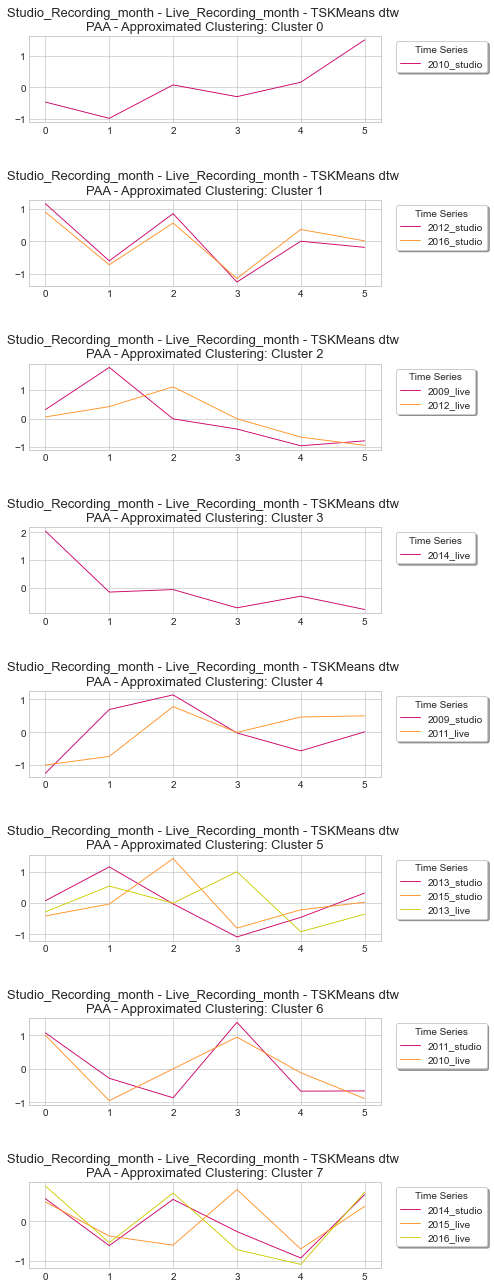

In [5259]:
analyze_approximated_clusters(labels_studio_live_paa_dtw, X_paa, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nPAA - Approximated Clustering', True)

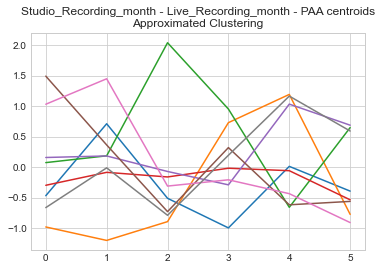

In [5260]:
plot_centroids_approximated(cluster_centers_studio_live_paa_dtw, X_paa, album_type, 'PAA')

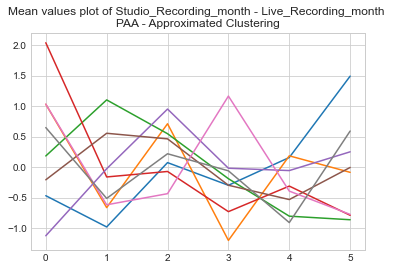

In [5261]:
plot_mean_values_approximated(labels_studio_live_paa_dtw, X_paa, album_type, 'PAA')

<h3>OneD_SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5262]:
n_sax1d_segments = 6
n_sax_symbols_avg = 6
n_sax_symbols_slope = 4

one_d_sax = OneD_SymbolicAggregateApproximation(n_segments=n_sax1d_segments,\
     alphabet_size_avg=n_sax_symbols_avg, alphabet_size_slope=n_sax_symbols_slope)

X_sax1d = one_d_sax.fit_transform(tss_studio_live_scaled)

In [5263]:
#plt.plot(X_sax1d.reshape(X_sax1d.shape[1], X_sax1d.shape[0]))
#plt.title(album_type + "\nOneD_Sax - Approximated TSs")
#plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  18.88095238095238 Silhouette Score:  0.12917043959438546

k:  3 SSE:  15.540624999999999 Silhouette Score:  0.13035221414749373

k:  4 SSE:  13.174999999999999 Silhouette Score:  0.1436279650760401

k:  5 SSE:  10.885416666666666 Silhouette Score:  0.15056508769131452

k:  6 SSE:  9.302083333333332 Silhouette Score:  0.14789044373908994

k:  7 SSE:  7.760416666666666 Silhouette Score:  0.13084902557729577

k:  8 SSE:  6.239583333333334 Silhouette Score:  0.13085329994058406

k:  9 SSE:  4.84375 Silhouette Score:  0.1378199190658668

k:  10 SSE:  4.03125 Silhouette Score:  0.10446226928113463

k:  11 SSE:  3.0833333333333335 Silhouette Score:  0.07906249277854832

k:  12 SSE:  2.2708333333333335 Silhouette Score:  0.06011377537466976

k:  13 SSE:  1.59375 Silhouette Score:  0.04753380247050587

k:  14 SSE:  0.9687500000000001 Silhouette Score:  0.03934987211424356

k:  15 SSE:  0.34375 Silhouette Score:  0.01864986431385178



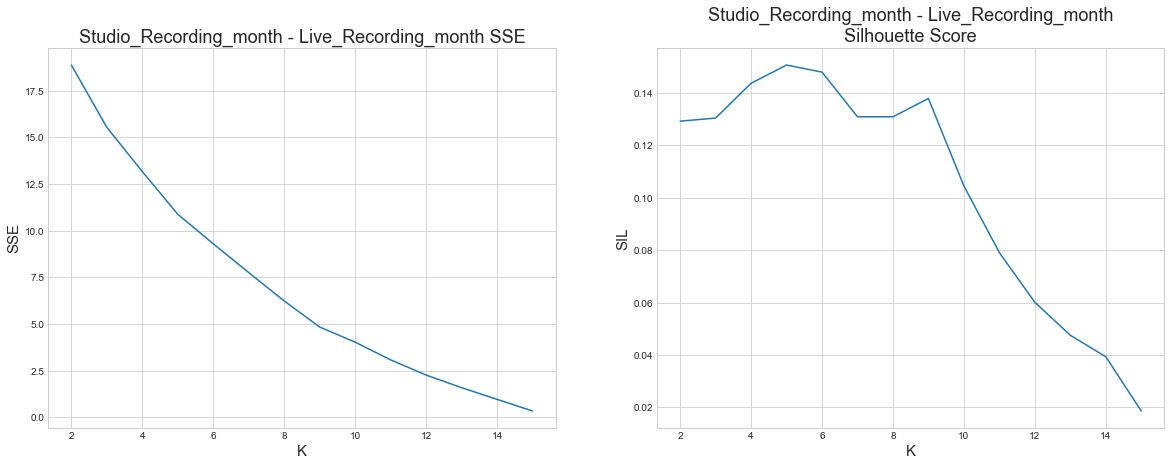

In [5264]:
find_optimal_k_kmeans(15, 'euclidean', X_sax1d, False, album_type)

In [5265]:
cluster_centers_studio_live_sax1d, dict_label_studio_live_sax1d, \
labels_studio_live_sax1d = run_kmeans(5, 1000, 10, 'euclidean', X_sax1d, False)

cluster_centers_shape (5, 6, 2)

Labels:  {0: 3, 1: 3, 2: 4, 3: 2, 4: 4}

SSE:  10.885416666666666
Silhouette Score:  0.15056508769131452


In [5266]:
#analyze_approximated_clusters(labels_studio_live_sax1d, X_sax1d, df_tss_studio_live_scaled, \
#                              album_type, \
#                              '\nTSKMeans - OneD_SAX - Approximated Clustering', True)

In [5267]:
#plot_centroids_approximated(cluster_centers_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

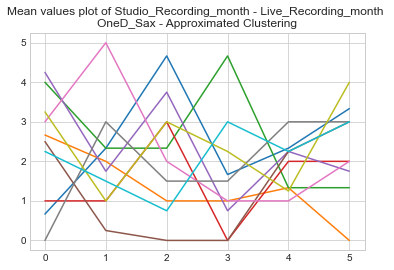

In [5268]:
plot_mean_values_approximated(labels_studio_live_sax1d, X_sax1d, album_type, 'OneD_Sax')

<h3>DTW</h3>

k:  2 SSE:  15.871194083694084 Silhouette Score:  0.08494428823568874

k:  3 SSE:  13.02455357142857 Silhouette Score:  0.09185547727318902

k:  4 SSE:  10.52906746031746 Silhouette Score:  0.10865306001823423

k:  5 SSE:  9.136458333333334 Silhouette Score:  0.11140402753842575

k:  6 SSE:  7.790178571428572 Silhouette Score:  0.11866343683224664

k:  7 SSE:  6.367708333333333 Silhouette Score:  0.12094712523929081

k:  8 SSE:  5.657366071428571 Silhouette Score:  0.059402752850631985

k:  9 SSE:  4.335416666666667 Silhouette Score:  0.061087616019630524

k:  10 SSE:  3.635416666666667 Silhouette Score:  0.06198589582538149

k:  11 SSE:  2.8854166666666665 Silhouette Score:  0.0578856110362051

k:  12 SSE:  2.135416666666667 Silhouette Score:  0.05177562293823616

k:  13 SSE:  1.4166666666666667 Silhouette Score:  0.034034269279328434

k:  14 SSE:  0.7916666666666667 Silhouette Score:  0.029619435666461285

k:  15 SSE:  0.34375 Silhouette Score:  0.01864986431385178



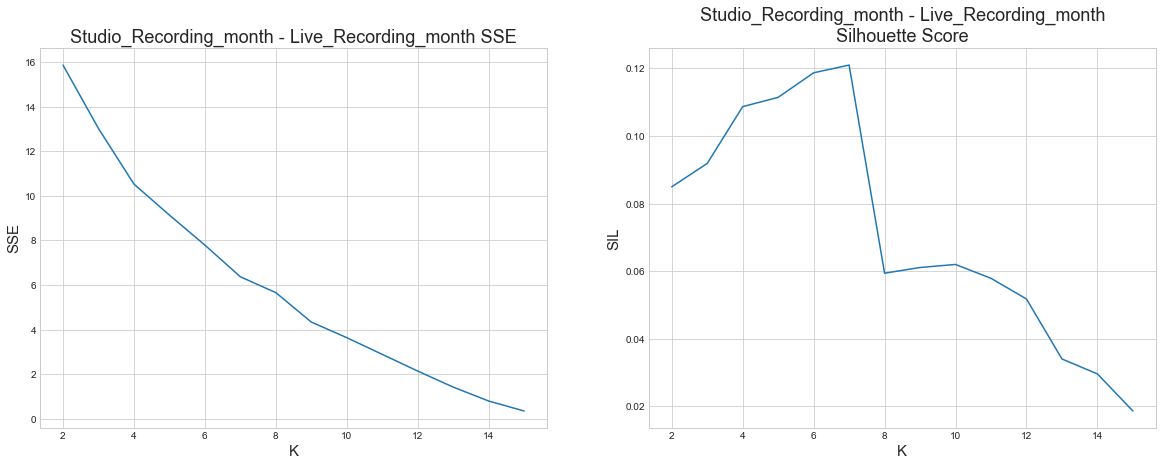

In [5269]:
find_optimal_k_kmeans(15, 'dtw', X_sax1d, False, album_type)

In [5270]:
cluster_centers_studio_live_sax1d_dtw, dict_label_studio_live_sax1d_dtw, \
labels_studio_live_sax1d_dtw = run_kmeans(7, 1000, 10, 'dtw', X_sax1d, False)

cluster_centers_shape (7, 6, 2)

Labels:  {0: 5, 1: 3, 2: 2, 3: 1, 4: 3, 5: 1, 6: 1}

SSE:  6.367708333333333
Silhouette Score:  0.12094712523929081


In [5271]:
#analyze_approximated_clusters(labels_studio_sax1d_dtw, X_sax1d, df_tss_studio_scaled, album_type, \
#                               'TSKMeans dtw \nOneD_SAX - Approximated Clustering', False)

In [5272]:
#plot_centroids_approximated(cluster_centers_studio_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

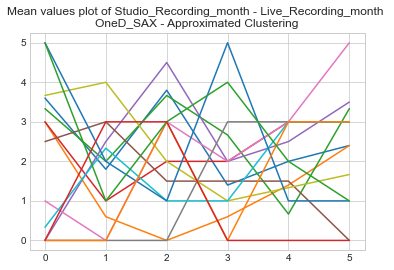

In [5273]:
plot_mean_values_approximated(labels_studio_live_sax1d_dtw, X_sax1d, album_type, 'OneD_SAX')

<h3>SymbolicAggregateApproximation</h3>

<h3>TimeSeriesKMeans</h3>

In [5274]:
n_sax_segments = 6
n_sax_symbols = 6

sax = SymbolicAggregateApproximation(n_segments=n_sax_segments, \
                                     alphabet_size_avg=n_sax_symbols)

X_sax = sax.fit_transform(tss_studio_live_scaled)

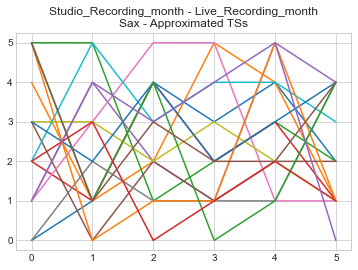

In [5275]:
plt.plot(X_sax.reshape(X_sax.shape[1], X_sax.shape[0]))
plt.title(album_type + "\nSax - Approximated TSs")
plt.show()

<h3>Euclidean</h3>

k:  2 SSE:  8.421875 Silhouette Score:  0.21772018535225243

k:  3 SSE:  6.2316964285714285 Silhouette Score:  0.2381229062514901

k:  4 SSE:  4.634375 Silhouette Score:  0.2672017049003116

k:  5 SSE:  3.69375 Silhouette Score:  0.3017365968275149

k:  6 SSE:  2.7968750000000004 Silhouette Score:  0.3317821895374686

k:  7 SSE:  2.0937500000000004 Silhouette Score:  0.31305098087839656

k:  8 SSE:  1.6770833333333335 Silhouette Score:  0.3060143271569611

k:  9 SSE:  1.28125 Silhouette Score:  0.3038327728774387

k:  10 SSE:  0.96875 Silhouette Score:  0.2791766700245704

k:  11 SSE:  0.71875 Silhouette Score:  0.2419775844334145

k:  12 SSE:  0.46875 Silhouette Score:  0.20093609420572944

k:  13 SSE:  0.2812500000000001 Silhouette Score:  0.17995915955876368

k:  14 SSE:  0.12500000000000003 Silhouette Score:  0.1313871279061092

k:  15 SSE:  0.06250000000000001 Silhouette Score:  0.0625



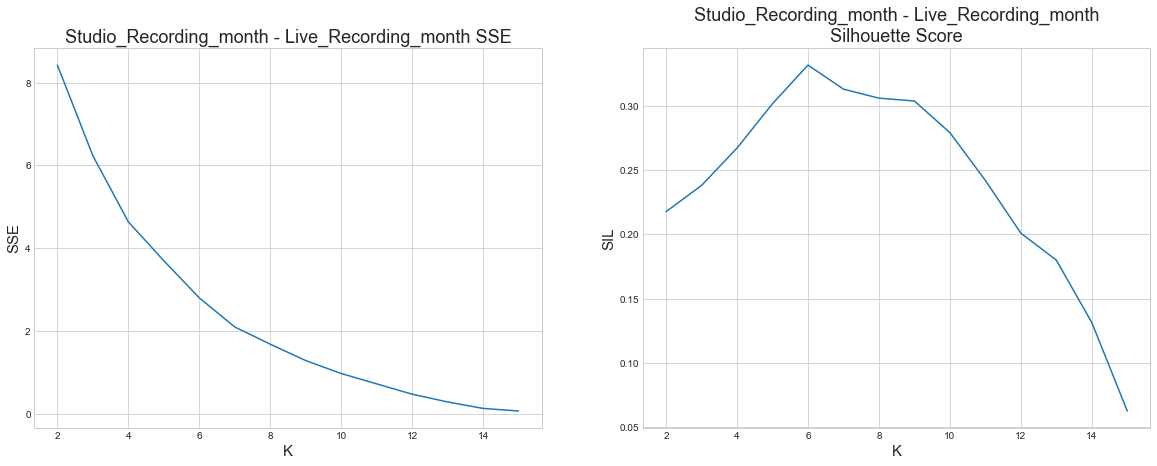

In [5276]:
find_optimal_k_kmeans(15, 'euclidean', X_sax, False, album_type)

In [5277]:
cluster_centers_studio_live_sax, dict_label_studio_live_sax, \
labels_studio_live_sax = run_kmeans(6, 1000, 10, 'euclidean', X_sax, False)

cluster_centers_shape (6, 6, 1)

Labels:  {0: 4, 1: 2, 2: 3, 3: 2, 4: 2, 5: 3}

SSE:  2.7968750000000004
Silhouette Score:  0.3317821895374686


Dataset con le labels associate


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         0  4  5  2  1  3       2
2010_studio         1  0  3  2  3  5       1
2011_studio         5  2  1  5  1  1       0
2012_studio         5  1  4  0  3  2       5
2013_studio         3  5  2  0  1  3       3
2014_studio         4  1  4  2  1  4       4
2015_studio         2  2  5  1  2  3       2
2016_studio         4  1  4  0  3  3       5
2009_live           3  5  2  2  1  1       3
2010_live           5  1  3  4  2  1       0
2011_live           0  1  4  2  4  4       1
2012_live           3  3  5  2  1  1       2
2013_live           2  4  3  5  1  2       0
2014_live           5  2  2  1  2  1       5
2015_live           4  2  1  4  1  3       0
2016_live           4  1  4  1  0  4       4

Cluster 0
 ['2011_studio', '2010_live', '2013_live', '2015_live']

Cluster 1
 ['2010_studio', '2011_live']

Cluster 2
 ['2009_studio', '2015_studio', '2012_live']

Cluster 3
 ['2013_studio', '2009_live']

Cluster 4
 ['2014_studio', '2016_live']

Cluster 5
 ['2012_studio', '2016_studio', '2014_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              3            4  0.8113  0.7500
Cluster 1                1              1            2  1.0000  0.5000
Cluster 2                2              1            3  0.9183  0.6667
Cluster 3                1              1            2  1.0000  0.5000
Cluster 4                1              1            2  1.0000  0.5000
Cluster 5                2              1            3  0.9183  0.6667
Total                    8              8           16  0.9222  0.6250

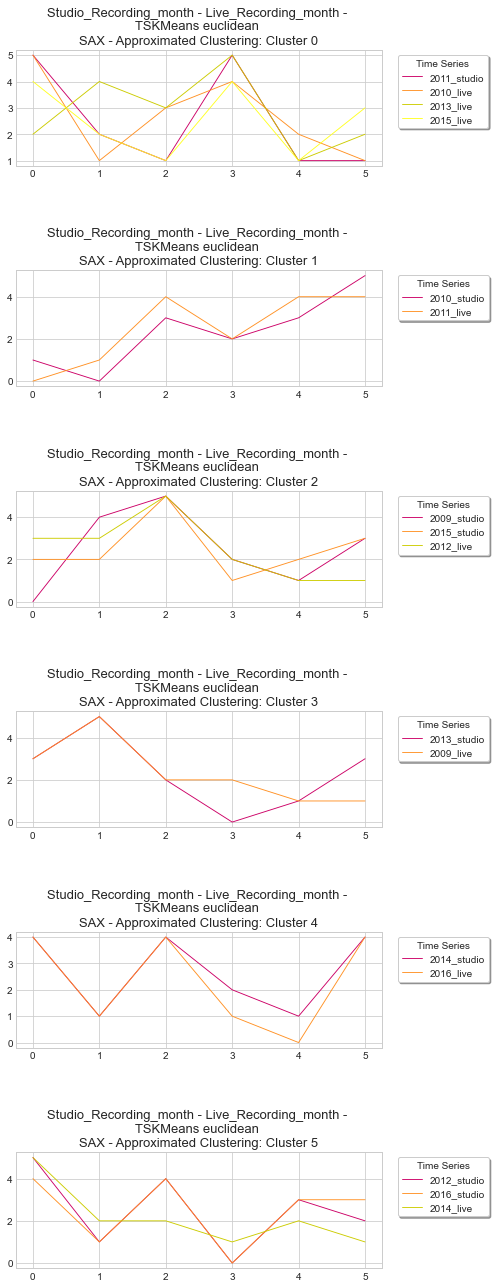

In [5278]:
analyze_approximated_clusters(labels_studio_live_sax, X_sax, df_tss_studio_live_scaled, \
                              album_type, \
                              '\nTSKMeans euclidean \nSAX - Approximated Clustering', True)

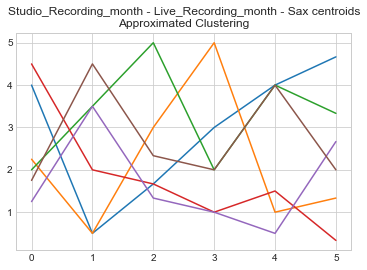

In [5279]:
plot_centroids_approximated(cluster_centers_studio_live_sax, X_sax, album_type, 'Sax')

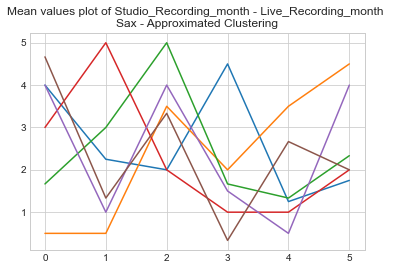

In [5280]:
plot_mean_values_approximated(labels_studio_live_sax, X_sax, album_type, 'Sax')

<h3>DTW</h3>

k:  2 SSE:  4.3918244949494945 Silhouette Score:  0.24772118127949821

k:  3 SSE:  2.6243799603174605 Silhouette Score:  0.27636600295360303

k:  4 SSE:  2.002529761904762 Silhouette Score:  0.3019880624691049

k:  5 SSE:  1.745982142857143 Silhouette Score:  0.2670170272919932

k:  6 SSE:  1.462202380952381 Silhouette Score:  0.22631518931165528

k:  7 SSE:  1.1302083333333333 Silhouette Score:  0.21652822956015902

k:  8 SSE:  0.9583333333333333 Silhouette Score:  0.21091893290943584

k:  9 SSE:  0.7770833333333333 Silhouette Score:  0.1699037988382942

k:  10 SSE:  0.6041666666666667 Silhouette Score:  0.14423023220499237

k:  11 SSE:  0.3906250000000001 Silhouette Score:  0.23559412658010473

k:  12 SSE:  0.234375 Silhouette Score:  0.21733170388402634

k:  13 SSE:  0.12500000000000003 Silhouette Score:  0.16624375355987503

k:  14 SSE:  0.06250000000000001 Silhouette Score:  0.14330582617584078

k:  15 SSE:  0.0 Silhouette Score:  0.125



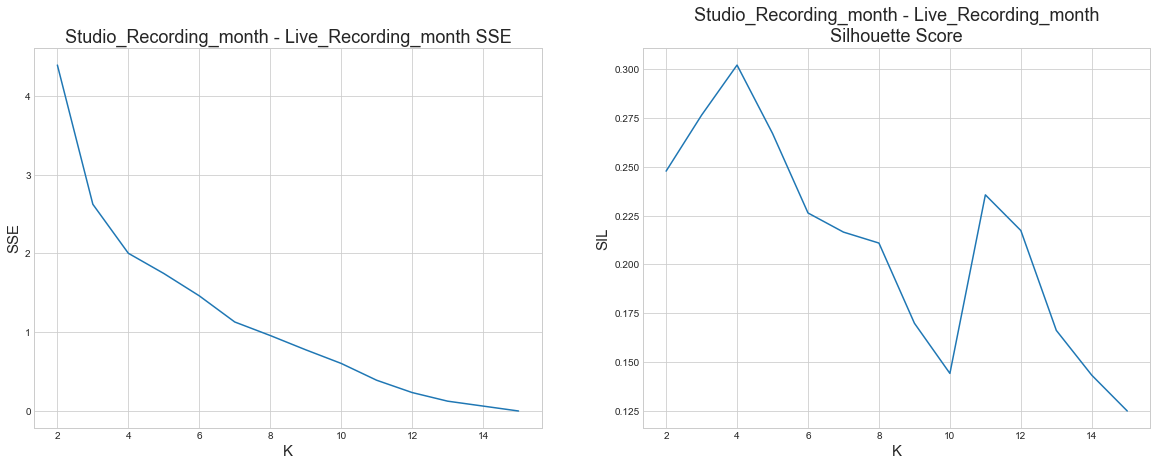

In [5281]:
find_optimal_k_kmeans(15, 'dtw', X_sax, False, album_type)

In [5282]:
cluster_centers_studio_live_sax_dtw, dict_label_studio_live_sax_dtw, \
labels_studio_live_sax_dtw = run_kmeans(4, 1000, 10, 'dtw', X_sax, False)

cluster_centers_shape (4, 6, 1)

Labels:  {0: 3, 1: 3, 2: 5, 3: 5}

SSE:  2.002529761904762
Silhouette Score:  0.3019880624691049


Dataset con le labels associate


0  1  2  3  4  5  Labels
track_date_created                          
2009_studio         0  4  5  2  1  3       1
2010_studio         1  0  3  2  3  5       1
2011_studio         5  2  1  5  1  1       0
2012_studio         5  1  4  0  3  2       2
2013_studio         3  5  2  0  1  3       3
2014_studio         4  1  4  2  1  4       2
2015_studio         2  2  5  1  2  3       3
2016_studio         4  1  4  0  3  3       2
2009_live           3  5  2  2  1  1       3
2010_live           5  1  3  4  2  1       0
2011_live           0  1  4  2  4  4       1
2012_live           3  3  5  2  1  1       3
2013_live           2  4  3  5  1  2       3
2014_live           5  2  2  1  2  1       0
2015_live           4  2  1  4  1  3       2
2016_live           4  1  4  1  0  4       2

Cluster 0
 ['2011_studio', '2010_live', '2014_live']

Cluster 1
 ['2009_studio', '2010_studio', '2011_live']

Cluster 2
 ['2012_studio', '2014_studio', '2016_studio', '2015_live', '2016_live']

Cluster 3
 ['2013_studio', '2015_studio', '2009_live', '2012_live', '2013_live']



Studio_Recording Live_Recording  Tot_Cluster Entropy  Purity
Cluster 0                1              2            3  0.9183  0.6667
Cluster 1                2              1            3  0.9183  0.6667
Cluster 2                3              2            5  0.9710  0.6000
Cluster 3                2              3            5  0.9710  0.6000
Total                    8              8           16  0.9512  0.6250

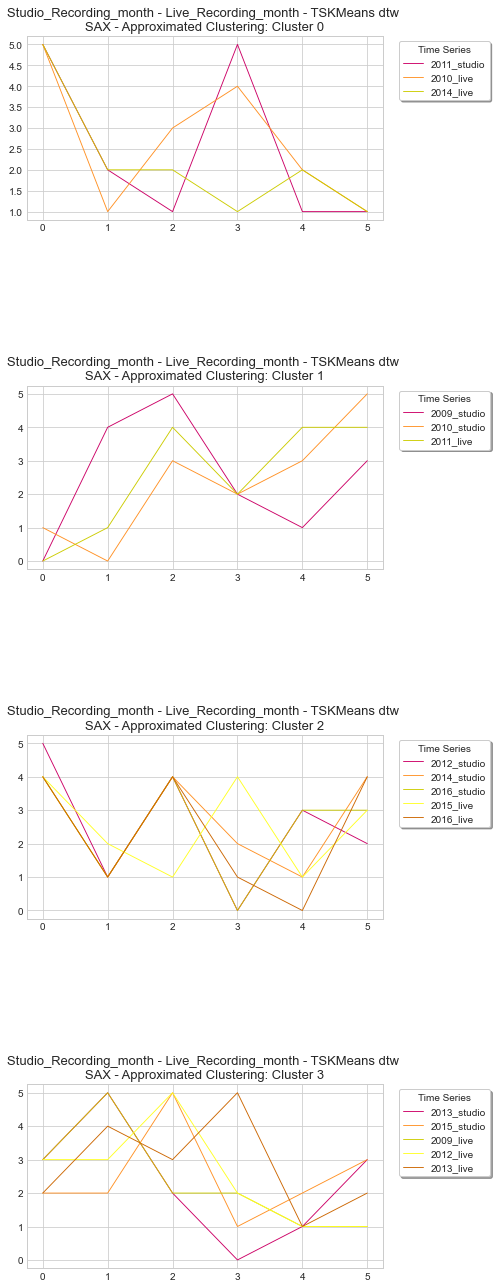

In [5283]:
analyze_approximated_clusters(labels_studio_live_sax_dtw, X_sax, df_tss_studio_live_scaled, album_type, \
                               'TSKMeans dtw \nSAX - Approximated Clustering', True)

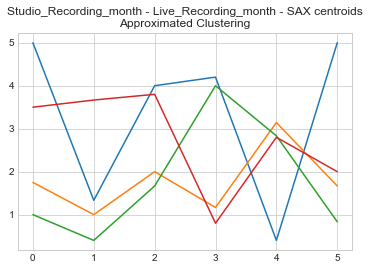

In [5284]:
plot_centroids_approximated(cluster_centers_studio_live_sax_dtw, X_sax, album_type, 'SAX')

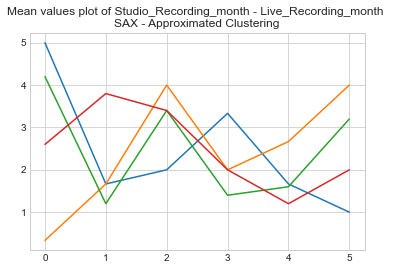

In [5285]:
plot_mean_values_approximated(labels_studio_live_sax_dtw, X_sax, album_type, 'SAX')